# Aim :
    #   To predict will an employee will continue to work in the company.
    #   To draw insights about employee attrition from the data

# Notebook Contents :
    #   Basic analysis to understand data
    #   Exploratory Data Analysis (EDA)
    #   Summary of EDA
    #   Feature Engineering
    #   Modeling
    #   Conclusion

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_column',None)

In [2]:
# reading dataset to python environment
ibm_data=pd.read_csv('IBM_HR_Data_re.csv')

In [3]:
# Viewing Dataset
ibm_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123456,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123458,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,123462,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,123463,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,123464,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


#### Description for different categorical features in dataset:
#### Education
  1.'Below College'
  2.'College'
  3.'Bachelor'
  4.'Master'
  5.'Doctorate'
#### Environment Satisfaction
  1.'Low'
  2.'Medium'
  3.'High'
  4.'Very High'
#### Job Involvement
  1.'Low'
  2.'Medium'
  3.'High'
  4.'Very High'
#### Job Satisfaction
  1.'Low'
  2.'Medium'
  3.'High'
  4.'Very High'
#### Performance Rating
  3.'Good'
  4.'Excellent'
#### Relationship Satisfaction
  1.'Low'
  2.'Medium'
  3.'High'
  4.'Very High'
#### Work Life Balance
  1.'Bad'
  2.'Good'
  3.'Better'
  4.'Best'

## Basic Analysis To Understand The Data

In [4]:
# assigning name for dataset
data=ibm_data

In [5]:
#checking shape of data
data.shape

(23436, 37)

In [6]:
#checking basic info
data.info()
# From the result dtype of some columns are mismatching.It means we have wrongly placed values in our dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23436 entries, 0 to 23435
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23433 non-null  float64
 1   Attrition                 23423 non-null  object 
 2   BusinessTravel            23428 non-null  object 
 3   DailyRate                 23424 non-null  float64
 4   Department                23425 non-null  object 
 5   DistanceFromHome          23427 non-null  object 
 6   Education                 23424 non-null  float64
 7   EducationField            23427 non-null  object 
 8   EmployeeCount             23431 non-null  object 
 9   EmployeeNumber            23435 non-null  object 
 10  Application ID            23433 non-null  object 
 11  EnvironmentSatisfaction   23427 non-null  float64
 12  Gender                    23426 non-null  object 
 13  HourlyRate                23427 non-null  object 
 14  JobInv

In [7]:
# Viewing basic statistical analysis of numerical columns in dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,23433.0,36.936671,9.137432,18.0,30.0,36.0,43.0,60.0
DailyRate,23424.0,801.828765,403.206166,102.0,465.0,802.0,1157.0,1499.0
Education,23424.0,2.910050,1.024931,1.0,2.0,3.0,4.0,6.0
EnvironmentSatisfaction,23427.0,13.681777,1186.544372,1.0,2.0,3.0,4.0,129588.0
JobInvolvement,23427.0,2.733811,0.836860,1.0,2.0,3.0,3.0,54.0
JobLevel,23429.0,2.064023,1.105421,1.0,1.0,2.0,3.0,5.0
MonthlyRate,23425.0,14304.343821,7102.636293,2094.0,8053.0,14222.0,20460.0,26999.0
NumCompaniesWorked,23427.0,3.887779,155.332904,0.0,1.0,2.0,4.0,23258.0
PerformanceRating,23426.0,3.155852,0.371215,3.0,3.0,3.0,3.0,13.0
RelationshipSatisfaction,23428.0,2.713334,1.080030,1.0,2.0,3.0,4.0,4.0


In [8]:
# Checking for duplicate values in dataset
data.duplicated().sum()

14

In [9]:
# Viewing duplicated rows
data[data.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
10,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123456,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
11,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123458,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
12,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,123462,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
666,37.0,Voluntary Resignation,Travel_Rarely,807.0,Human Resources,6,4.0,Human Resources,1,1,123457,1.0,Female,37,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,4.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
667,37.0,Voluntary Resignation,Travel_Rarely,807.0,Human Resources,6,4.0,Marketing,1,4,123459,1.0,Female,37,3.0,2.0,Sales Executive,4,Single,5993,19479.0,5.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
668,37.0,Voluntary Resignation,Travel_Rarely,807.0,Human Resources,6,4.0,Human Resources,1,5,123460,1.0,Female,37,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
669,37.0,Voluntary Resignation,Travel_Rarely,807.0,Human Resources,6,4.0,Marketing,1,6,123461,1.0,Female,37,3.0,2.0,Sales Executive,4,Single,5993,19479.0,5.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
6109,26.0,Voluntary Resignation,Travel_Rarely,1357.0,Research & Development,25,3.0,Life Sciences,1,813,124268,1.0,Male,48,1.0,1.0,Laboratory Technician,3,Single,2293,21534.0,1.0,Y,No,12,3.0,3.0,80.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,1.0,Seek
6110,26.0,Voluntary Resignation,Travel_Rarely,1357.0,Research & Development,25,3.0,Technical Degree,1,814,124269,1.0,Male,48,1.0,1.0,Laboratory Technician,3,Single,2293,26009.0,1.0,Y,No,12,3.0,3.0,80.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,1.0,Seek
6111,26.0,Voluntary Resignation,Travel_Rarely,1357.0,Research & Development,25,3.0,Life Sciences,1,815,124270,1.0,Male,48,1.0,1.0,Laboratory Technician,3,Single,2293,10558.0,1.0,Y,No,12,3.0,3.0,80.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,1.0,Seek


In [10]:
# dropping duplicate rows
data=data.drop_duplicates()

In [11]:
# resetting the index after dropping duplicate rows
data.reset_index(inplace=True)
data=data.drop('index',axis=1)

In [12]:
# checking for null values
data.isna().sum()

Age                          3
Attrition                   13
BusinessTravel               8
DailyRate                   12
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeCount                5
EmployeeNumber               1
Application ID               3
EnvironmentSatisfaction      9
Gender                      10
HourlyRate                   9
JobInvolvement               9
JobLevel                     7
JobRole                      9
JobSatisfaction              9
MaritalStatus               11
MonthlyIncome               13
MonthlyRate                 11
NumCompaniesWorked           9
Over18                      10
OverTime                    12
PercentSalaryHike           14
PerformanceRating           10
RelationshipSatisfaction     8
StandardHours               10
StockOptionLevel             9
TotalWorkingYears            8
TrainingTimesLastYear       11
WorkLifeBalance             10
YearsAtC

In [13]:
# Displaying column names
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'Application ID', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Employee Source'],
      dtype='object')

In [14]:
# Renaming certain columns with space to avoid errors
data.rename(columns={'Employee Source':'EmployeeSource','Application ID':'ApplicationID'},inplace=True)

In [15]:
# Displaying the number of unique values in each columns
data.nunique()

Age                            43
Attrition                       2
BusinessTravel                  3
DailyRate                     883
Department                      4
DistanceFromHome               59
Education                       6
EducationField                  8
EmployeeCount                   3
EmployeeNumber              23366
ApplicationID               23419
EnvironmentSatisfaction         6
Gender                          4
HourlyRate                     73
JobInvolvement                  6
JobLevel                        5
JobRole                        11
JobSatisfaction                 5
MaritalStatus                   4
MonthlyIncome                1351
MonthlyRate                  1429
NumCompaniesWorked             12
Over18                          2
OverTime                        3
PercentSalaryHike              17
PerformanceRating               4
RelationshipSatisfaction        4
StandardHours                   3
StockOptionLevel                5
TotalWorkingYe

In [16]:
# Displaying unique values and it's counts in each column
col=data.columns

for i in col:
    vc=data[i].value_counts()
    vc=pd.DataFrame(vc)
    print(i,vc)

Age        Age
34.0  1230
35.0  1227
36.0  1106
31.0  1085
29.0  1075
32.0   984
30.0   952
38.0   945
33.0   927
40.0   893
37.0   802
27.0   773
28.0   753
42.0   737
39.0   661
45.0   650
41.0   645
26.0   608
44.0   528
46.0   520
43.0   512
50.0   481
25.0   416
24.0   416
49.0   385
47.0   383
55.0   349
53.0   309
48.0   304
51.0   302
52.0   288
54.0   287
22.0   257
58.0   224
23.0   223
56.0   223
21.0   210
20.0   175
59.0   161
19.0   143
18.0   127
60.0    80
57.0    63
Attrition                        Attrition
Current employee           19711
Voluntary Resignation       3698
BusinessTravel                    BusinessTravel
Travel_Rarely               16606
Travel_Frequently            4413
Non-Travel                   2395
DailyRate         DailyRate
691.0          99
408.0          81
1329.0         80
530.0          79
1082.0         79
...           ...
296.0          15
866.0          15
573.0          14
1122.0         14
1387.0         14

[883 rows x 1 columns]
De

In [17]:
# Displaying all misplaced values
data[(data.Department=='1296')|(data.DistanceFromHome=='Research & Development')|(data.EducationField==3)|
     (data.EducationField=='Test')|(data.EmployeeCount=='Marketing')|(data['ApplicationID']=='Test')|
     (data['ApplicationID']=='?????')|(data.EmployeeNumber=='Test')|(data.EmployeeNumber=='TEST')|(data.EmployeeNumber=='TESTING')|
     (data.EnvironmentSatisfaction==127249 | 129588)|(data.Gender==1 | 2)|(data.HourlyRate=='Male')|(data.HourlyRate=='Female')|
     (data.JobInvolvement==47 | 54)|(data.JobRole==5 | 4)|(data.JobSatisfaction=='Manager')|(data.MaritalStatus==4)|
     (data.NumCompaniesWorked==4933.0)|(data.NumCompaniesWorked==23258.0)|(data.Over18==1)|(data.OverTime=='Y')|
     (data.PercentSalaryHike=='No')|(data.PercentSalaryHike=='Yes')|(data.StandardHours==4|3)|(data.StockOptionLevel==80)|
     (data.TrainingTimesLastYear==22|30)|(data['EmployeeSource']=='Test')]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,ApplicationID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeSource
7249,28.0,Voluntary Resignation,Travel_Frequently,1009.0,Research & Development,1,3.0,Medical,1,16793,140248,4.0,Male,83,3.0,2.0,Sales Executive,3,Married,5301,2939.0,8.0,Y,No,15,3.0,3.0,80.0,2.0,4.0,2.0,2.0,2.0,1.0,2.0,2.0,Test
7320,28.0,Voluntary Resignation,Travel_Frequently,1496.0,Sales,1,3.0,Life Sciences,1,Test,146361,4.0,Female,99,4.0,3.0,Research Director,4,Married,13744,15471.0,1.0,Y,Yes,25,4.0,1.0,80.0,1.0,16.0,2.0,3.0,16.0,11.0,6.0,8.0,Indeed
8352,36.0,Current employee,Travel_Rarely,1351.0,Research & Development,26,4.0,Technical Degree,1,TESTING,TESTING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10030,29.0,Current employee,Travel_Rarely,590.0,Research & Development,4,3.0,Life Sciences,1,23225,?????,4.0,Male,100,3.0,2.0,Sales Executive,3,Divorced,6728,14255.0,5.0,Y,No,12,3.0,4.0,80.0,2.0,12.0,3.0,3.0,6.0,3.0,0.0,1.0,Adzuna
14041,19.0,Voluntary Resignation,Non-Travel,504.0,Research & Development,10,3.0,Medical,1,23518,Test,2.0,Male,84,3.0,3.0,Research Scientist,4,Single,11244,4297.0,2.0,Y,No,25,4.0,2.0,80.0,0.0,10.0,5.0,4.0,5.0,2.0,0.0,0.0,Company Website
15644,33.0,Current employee,Travel_Frequently,NaN,1296,Research & Development,6.0,3,Marketing,1,3794,127249.0,1,Male,47.0,3.0,5,Manager,4,Married,19232.0,4933.0,1,Y,No,11.0,3.0,4.0,80.0,0.0,22.0,3.0,3.0,22.0,17.0,11.0,15
17016,44.0,Current employee,Non-Travel,111.0,Research & Development,17.0,3.0,Medical,1,NaN,6133.0,129588.0,2,Female,54.0,3.0,4,Manager,4,Single,16659.0,23258.0,1,Y,Yes,13.0,3.0,3.0,80.0,0.0,30.0,2.0,3.0,5.0,4.0,1.0,2
21799,49.0,Current employee,Travel_Rarely,1495.0,Research & Development,5.0,4.0,Test,1,16727,140182.0,1.0,Male,96,3.0,2.0,Healthcare Representative,3,Married,6651,21534.0,0.0,Y,No,14,3.0,2.0,80.0,1.0,20.0,0.0,2.0,3.0,2.0,1.0,2.0,Recruit.net
22306,55.0,Current employee,Travel_Rarely,1441.0,Research & Development,22.0,3.0,Other,1,TEST,146608.0,4.0,Male,99,1.0,2.0,Sales Executive,4,Divorced,5406,10436.0,7.0,Y,No,24,4.0,1.0,80.0,1.0,15.0,4.0,2.0,15.0,12.0,11.0,11.0,Recruit.net


The above rows contain misplaced data.

In [18]:
# Dropping the rows with misplaced values 
data.drop([7249,7320,8352,10030,14041,15644,17016,21799,22306],inplace=True)


In [19]:
# Resetting index after dropping rows
data.reset_index(inplace=True)
data=data.drop('index',axis=1)

In [20]:
# setting attrition as first clmn
data['AgeYears']=data['Age']
data=data.drop('Age',axis=1)
data.rename(columns={'AgeYears':'Age'},inplace=True)
data

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,ApplicationID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeSource,Age
0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123456,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
1,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123458,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
2,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,123462,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
3,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,123463,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
4,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,123464,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23408,Current employee,Travel_Rarely,370.0,Research & Development,1.0,4.0,Medical,1,19344,142799.0,3.0,Male,92,1.0,3.0,Healthcare Representative,4,Single,10883,20467.0,3.0,Y,No,20,4.0,3.0,80.0,1.0,20.0,2.0,3.0,20.0,7.0,2.0,13.0,Company Website,60.0
23409,Current employee,Travel_Rarely,370.0,Research & Development,1.0,4.0,Life Sciences,1,19345,142800.0,3.0,Male,92,1.0,3.0,Healthcare Representative,4,Divorced,10883,20467.0,0.0,Y,No,20,4.0,3.0,80.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,Company Website,60.0
23410,Voluntary Resignation,Travel_Frequently,1009.0,Research & Development,1.0,3.0,Life Sciences,1,16794,140249.0,4.0,Male,83,3.0,2.0,Sales Executive,3,Married,5301,2939.0,4.0,Y,No,15,3.0,3.0,80.0,2.0,4.0,2.0,2.0,2.0,1.0,2.0,2.0,Adzuna,NaN
23411,Current employee,Travel_Rarely,1354.0,Research & Development,5.0,3.0,Medical,1,1956,125411.0,3.0,Female,45,2.0,3.0,Manager,1,Single,11631,5615.0,2.0,Y,No,12,3.0,4.0,80.0,0.0,14.0,6.0,3.0,11.0,10.0,5.0,8.0,Indeed,NaN


In [21]:
data.shape

(23413, 37)

In [22]:
# Saving the dataset after basic cleaning
data.to_csv('IBM_HR_Data_cleaned.csv',index=False)# index =False is used to not to give index as a clmn

### **Exploratory Data Analysis**

In [23]:
# Reading the saved dataset for EDA
ibm_data_cleaned=pd.read_csv('IBM_HR_Data_cleaned.csv')

In [24]:
# Assigning new name for dataset
data=ibm_data_cleaned

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23413 entries, 0 to 23412
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 23400 non-null  object 
 1   BusinessTravel            23405 non-null  object 
 2   DailyRate                 23402 non-null  float64
 3   Department                23402 non-null  object 
 4   DistanceFromHome          23404 non-null  float64
 5   Education                 23401 non-null  float64
 6   EducationField            23404 non-null  object 
 7   EmployeeCount             23408 non-null  float64
 8   EmployeeNumber            23413 non-null  int64  
 9   ApplicationID             23410 non-null  float64
 10  EnvironmentSatisfaction   23405 non-null  float64
 11  Gender                    23404 non-null  object 
 12  HourlyRate                23405 non-null  float64
 13  JobInvolvement            23405 non-null  float64
 14  JobLev

In [26]:
# Displaying number of null values
data.isnull().sum()

Attrition                   13
BusinessTravel               8
DailyRate                   11
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeCount                5
EmployeeNumber               0
ApplicationID                3
EnvironmentSatisfaction      8
Gender                       9
HourlyRate                   8
JobInvolvement               8
JobLevel                     6
JobRole                      8
JobSatisfaction              8
MaritalStatus               10
MonthlyIncome               12
MonthlyRate                 10
NumCompaniesWorked           8
Over18                       9
OverTime                    11
PercentSalaryHike           13
PerformanceRating            9
RelationshipSatisfaction     7
StandardHours                9
StockOptionLevel             8
TotalWorkingYears            7
TrainingTimesLastYear       10
WorkLifeBalance              9
YearsAtCompany              12
YearsInC

In [27]:
# Dropping null values in dataset before EDA
data.dropna(inplace=True)

In [28]:
# Resetting the index column 
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)
data.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,ApplicationID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeSource,Age
0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1,123456.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,8.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
1,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1,123458.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,4.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
2,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,7,123462.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,8.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
3,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,8,123463.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,4.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
4,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,9,123464.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,8.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0


In [29]:
data.shape

(23184, 37)

In [30]:
# Creating a new dataset that contains only the numerical columns
numeric_data = data.select_dtypes(include=[np.number])

# Creating a new dataset that contains only the categorical columns
categorical_data = data.select_dtypes(include=[object])

In [31]:
numeric_data=numeric_data.drop(['EmployeeCount','EmployeeNumber', 'ApplicationID','StandardHours'],axis=1)

#### Correlation Matrix Plot

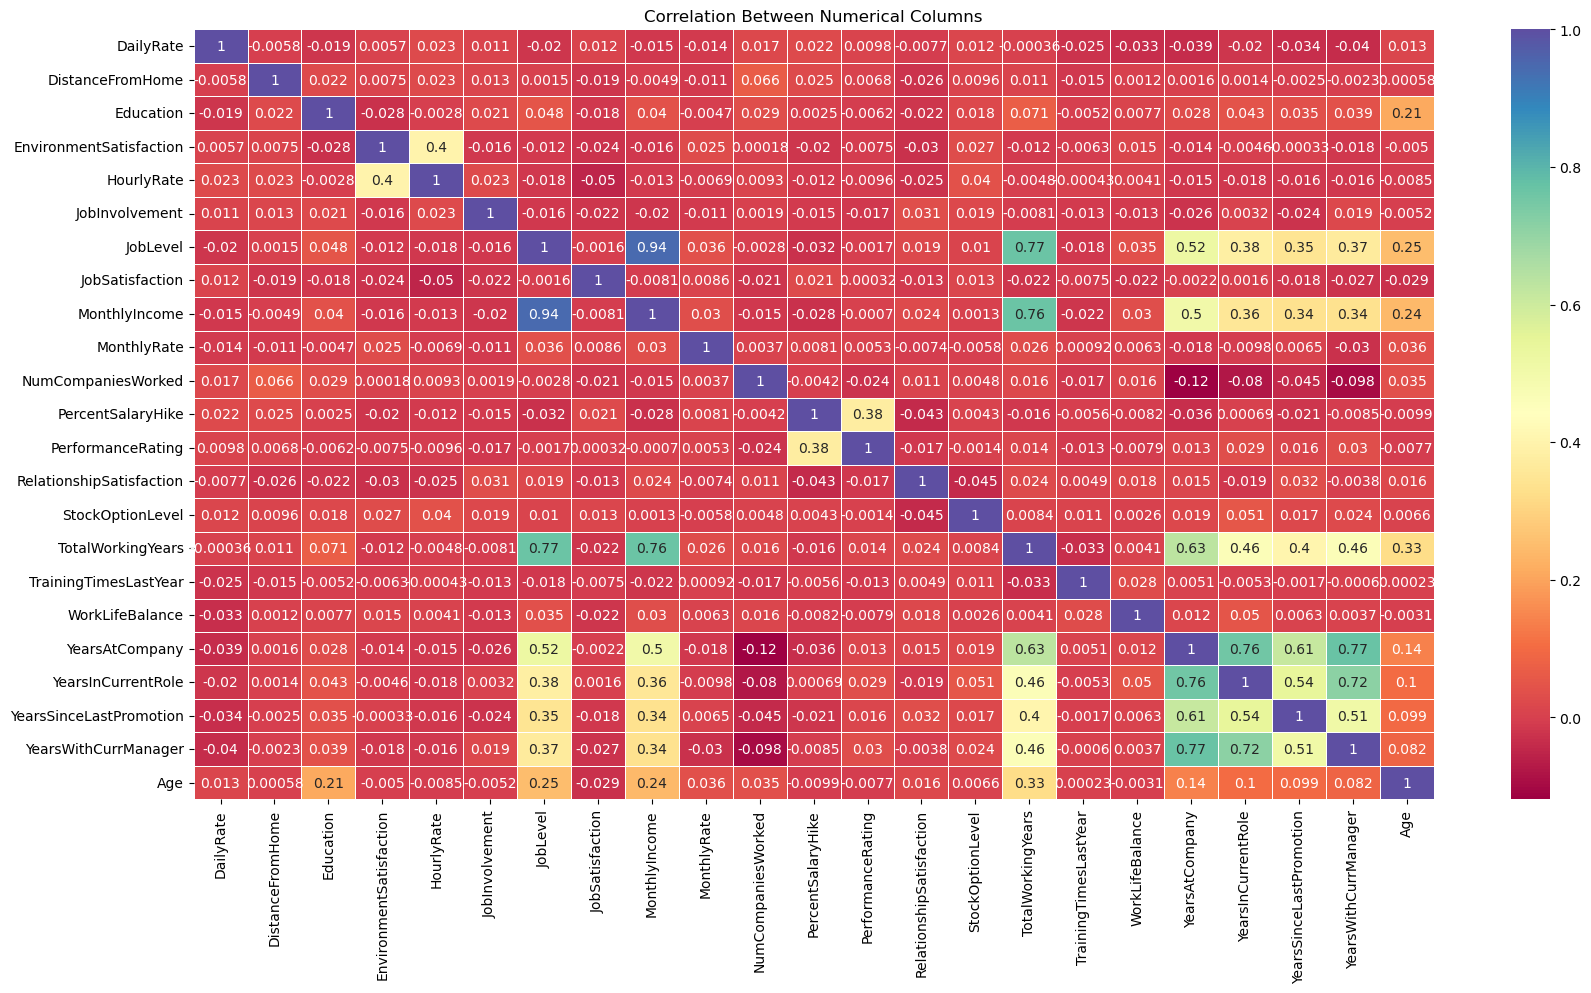

In [32]:
# creating correlation matrix of numerical columns and plotting it.
corr_matrix = numeric_data.corr()
plt.figure(figsize=(20,10))
plt.title('Correlation Between Numerical Columns')
#sns.heatmap(corr_matrix, annot=False, cmap='Blues')
sns.heatmap(corr_matrix,annot=True,xticklabels=True, yticklabels=True,linewidth=.5,cmap='Spectral')
plt.show()

#### Inferences obtained from plotting Correlation Matrix
 Variables like JobLevel, MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager are highly correlated. These variables may lead to multicollinearity. Heatmap shows Job Level and Monthly Income has a strong correlation. Higher the performance rating, higher the Percent salary hike. All other variables seem to have a less correlation value.

In [33]:
# To find summary statitics of numerical columns
numeric_data.describe().T

,count,mean,std,min,25%,50%,75%,max
DailyRate,23184.0,802.172058,403.176851,102.0,465.0,802.0,1157.0,1499.0
DistanceFromHome,23184.0,9.189010,8.098528,1.0,2.0,7.0,14.0,29.0
Education,23184.0,2.908687,1.025022,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,23184.0,2.719764,1.094868,1.0,2.0,3.0,4.0,4.0
HourlyRate,23184.0,65.850587,20.332752,30.0,48.0,66.0,83.0,100.0
JobInvolvement,23184.0,2.730547,0.710036,1.0,2.0,3.0,3.0,4.0
JobLevel,23184.0,2.065304,1.106056,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,23184.0,2.727571,1.101487,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,23184.0,6507.473042,4706.623380,1009.0,2911.0,4936.0,8380.0,19999.0
MonthlyRate,23184.0,14302.804865,7100.075821,2094.0,8053.0,14222.0,20460.0,26999.0


#### Inferences derived from summary statistics
   *Mean age of employee is 37. Most of the employees are below 43 years old.
   
   *Average working years at the company is around 6 years
   
   *Most employees get a promotion within 3 years.
   
   *Mostly employees work under a particular manager for almost 7 years

In [34]:
# Summary statistics of categorical columns
categorical_data.describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,EmployeeSource
count,23184,23184,23184,23184,23184,23184,23184,23184,23184,23184
unique,2,3,3,6,2,9,3,1,2,9
top,Current employee,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No,Company Website
freq,19524,16440,15120,9569,13902,5054,10610,23184,16621,5354


### Analysis of Target Variable

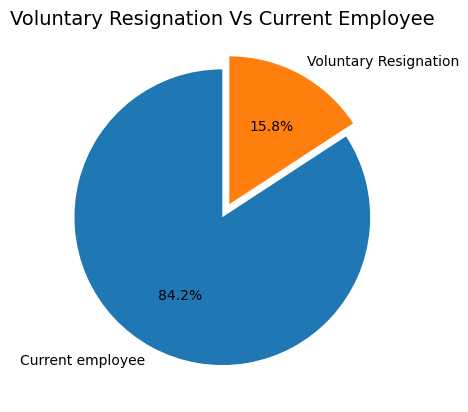

Current employee         84.213251
Voluntary Resignation    15.786749
Name: Attrition, dtype: float64

In [35]:
# Plot the Attrition 
plt.pie(data['Attrition'].value_counts(),labels=['Current employee','Voluntary Resignation'],
        startangle = 90,autopct='%1.1f%%',explode=(0,0.1));
plt.title('Voluntary Resignation Vs Current Employee',fontsize=14)
plt.show()
data['Attrition'].value_counts()/data['Attrition'].count()*100

The Attrition is 15.78% for this dataset.

### Analysis of Age

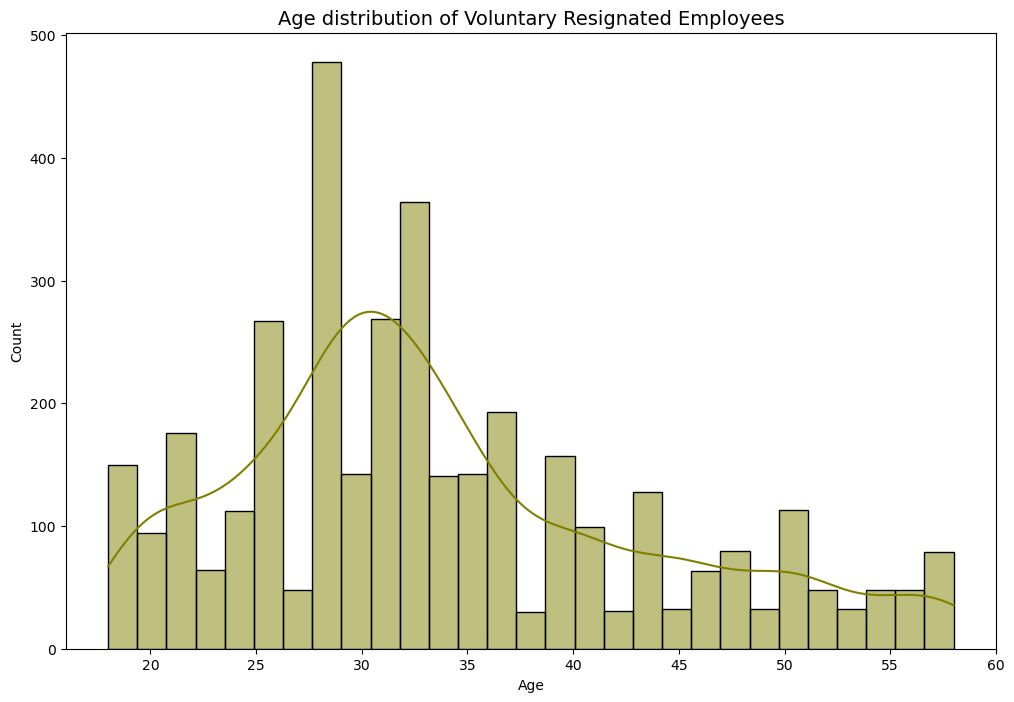

In [36]:
# Plot the distribution of age by Attrition Factor
plt.figure(figsize=(12,8))
plt.title('Age distribution of Voluntary Resignated Employees',fontsize=14)
sns.histplot(data.Age[data.Attrition == 'Voluntary Resignation'],color="olive",kde=True)
plt.show()

It shows most of the employees leave the company in 20's or in early 30's.Maybe they are swithching jobs for better opportunities.

#### Encoding Attrition

In [37]:
# Label encoding Attrition
from sklearn import preprocessing
lable_encd=preprocessing.LabelEncoder()
data['Attrition']=lable_encd.fit_transform(data['Attrition'])
data

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,ApplicationID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeSource,Age
0,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1,123456.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,8.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
1,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1,123458.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,4.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
2,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,7,123462.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,8.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
3,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,8,123463.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,4.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
4,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,9,123464.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,8.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23179,0,Travel_Rarely,370.0,Research & Development,1.0,4.0,Life Sciences,1.0,19337,142792.0,3.0,Male,92.0,1.0,3.0,Healthcare Representative,4.0,Divorced,10883.0,20467.0,0.0,Y,No,20.0,4.0,3.0,80.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,Company Website,60.0
23180,0,Travel_Rarely,370.0,Research & Development,1.0,4.0,Medical,1.0,19338,142793.0,3.0,Male,92.0,1.0,3.0,Healthcare Representative,4.0,Divorced,10883.0,20467.0,3.0,Y,No,20.0,3.0,3.0,80.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,Company Website,60.0
23181,0,Travel_Rarely,370.0,Research & Development,1.0,4.0,Life Sciences,1.0,19340,142795.0,3.0,Male,92.0,1.0,3.0,Healthcare Representative,4.0,Divorced,10883.0,20467.0,0.0,Y,No,20.0,3.0,3.0,80.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,Company Website,60.0
23182,0,Travel_Rarely,370.0,Research & Development,1.0,4.0,Medical,1.0,19344,142799.0,3.0,Male,92.0,1.0,3.0,Healthcare Representative,4.0,Single,10883.0,20467.0,3.0,Y,No,20.0,4.0,3.0,80.0,1.0,20.0,2.0,3.0,20.0,7.0,2.0,13.0,Company Website,60.0


### Analysis of BusinessTravel 

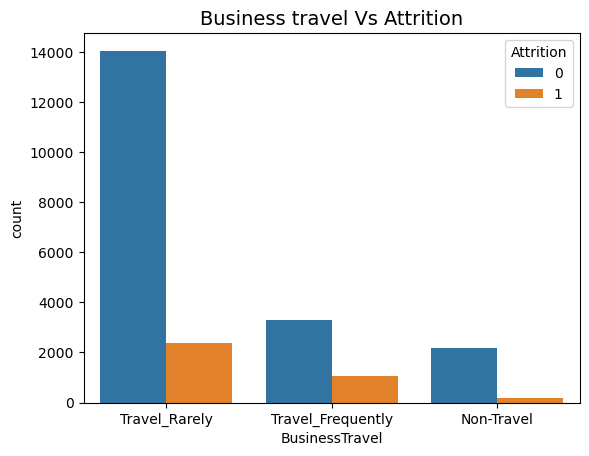

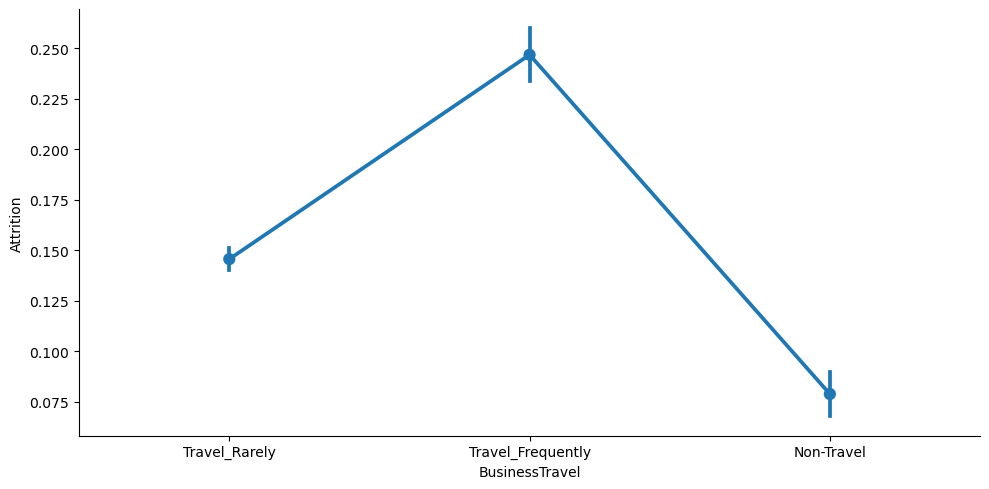

In [38]:
plt.title('Business travel Vs Attrition',fontsize=14)
sns.countplot(x='BusinessTravel',data=data,hue='Attrition')
sns.catplot(x='BusinessTravel',y='Attrition',data=data,kind='point',aspect=2);

 From the plot, attrition rate is very high for the one who travel frequently.

### Analysis of Department

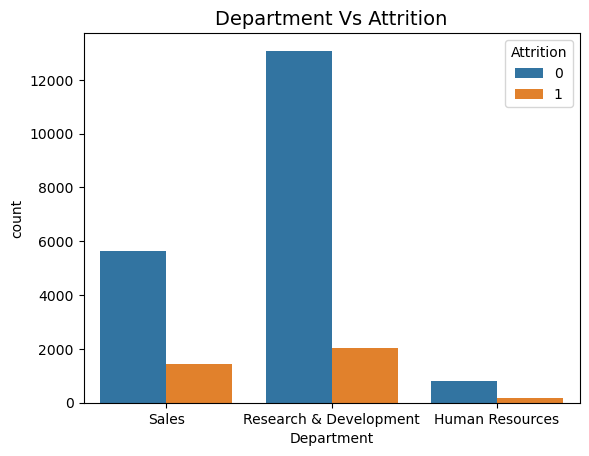

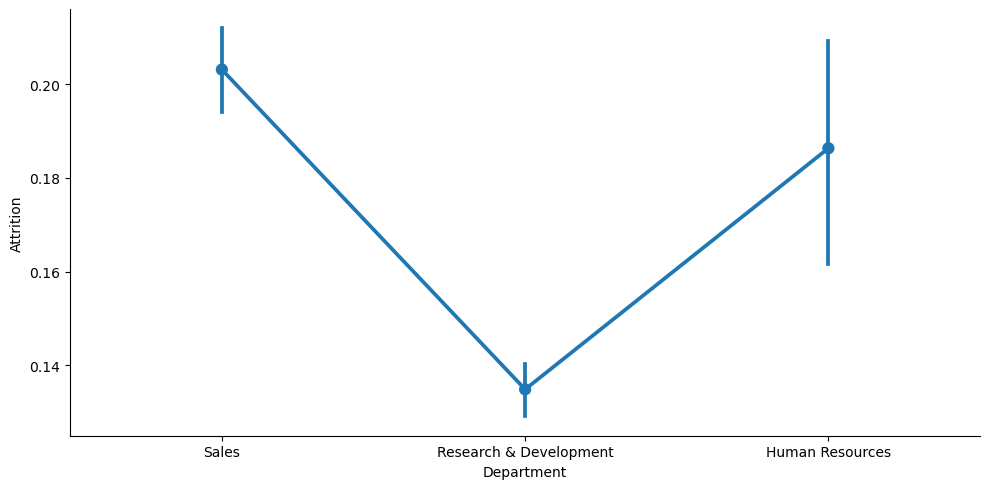

In [39]:
plt.title('Department Vs Attrition',fontsize=14)
sns.countplot(x='Department',data=data,hue='Attrition')
sns.catplot(x='Department',y='Attrition',data=data,kind='point',aspect=2);

Sales department has a higher rate of Attrition compared to the other two.

### Analysis of Distance From Home

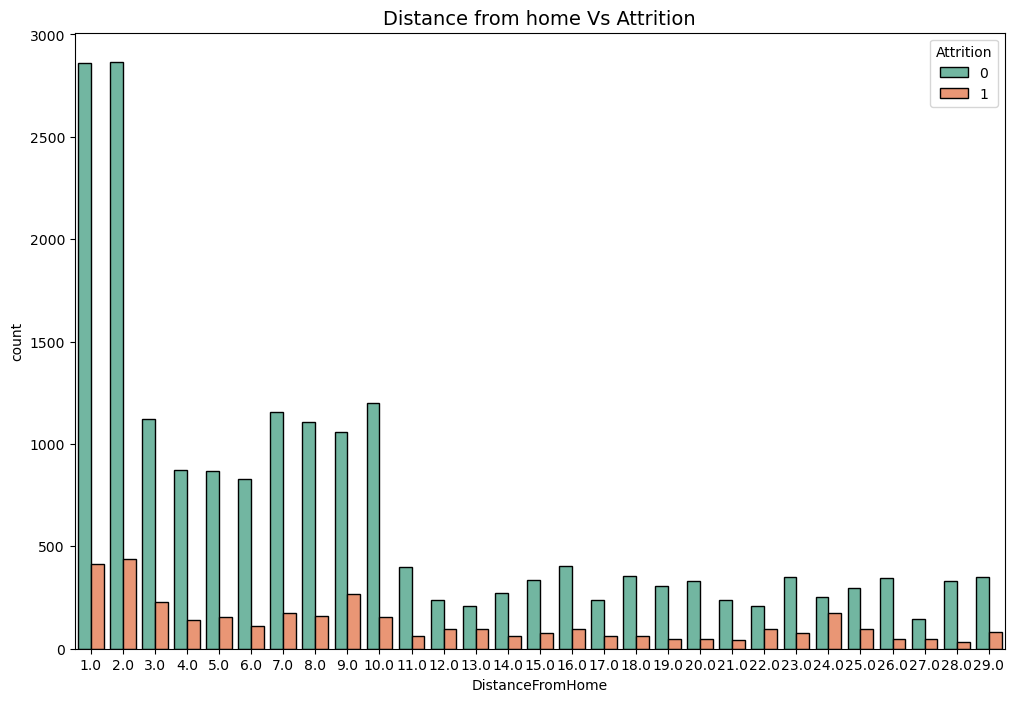

In [40]:
plt.figure(figsize=(12,8))
sns.countplot('DistanceFromHome', data = data, hue = 'Attrition', palette = "Set2",edgecolor = 'black')
plt.title('Distance from home Vs Attrition',fontsize=14)
plt.show()

Attrition rate increases with the commutaion time.

### Analysis of Education and Education Field

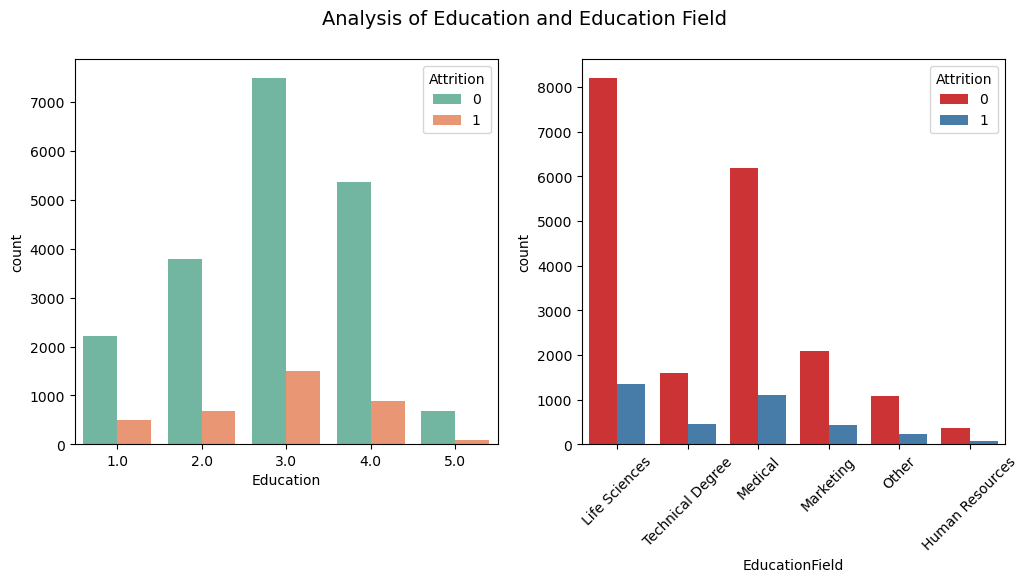

In [41]:
plt.figure(figsize=(12,5))
plt.suptitle('Analysis of Education and Education Field',fontsize=14)
plt.subplot(1,2,1)
sns.countplot(x='Education',data=data,hue='Attrition',palette='Set2');
plt.subplot(1,2,2)
sns.countplot(x='EducationField',data=data,hue='Attrition',palette='Set1');
plt.xticks(rotation=45)
plt.show()

In the case of Education the Attrition rate decreases as qualification increases. Employees with Technical degree shows high Attrition.

### Analysis of Environment Satisfaction

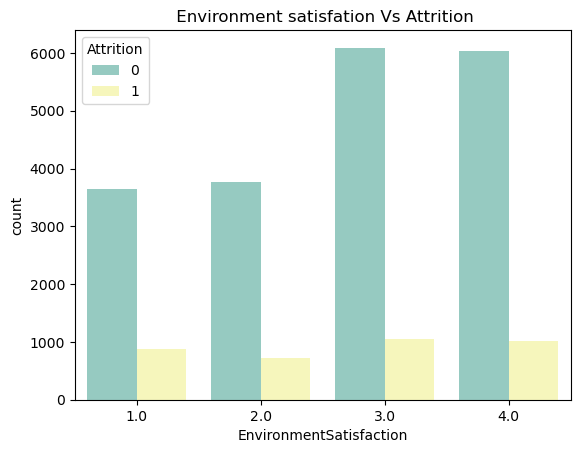

In [42]:
plt.title(' Environment satisfation Vs Attrition')
sns.countplot(data=data,x='EnvironmentSatisfaction',hue='Attrition',palette='Set3');

The employees with less environment satisfaction leaves the company.

# Analysis of Employee Source

In [43]:
data.groupby(['EmployeeSource'])['Attrition'].value_counts()

EmployeeSource   Attrition
Adzuna           0            1805
                 1             297
Company Website  0            4419
                 1             935
GlassDoor        0            1825
                 1             332
Indeed           0            2168
                 1             338
Jora             0            1957
                 1             440
LinkedIn         0            2000
                 1             314
Recruit.net      0            1973
                 1             331
Referral         0             332
                 1              77
Seek             0            3045
                 1             596
Name: Attrition, dtype: int64

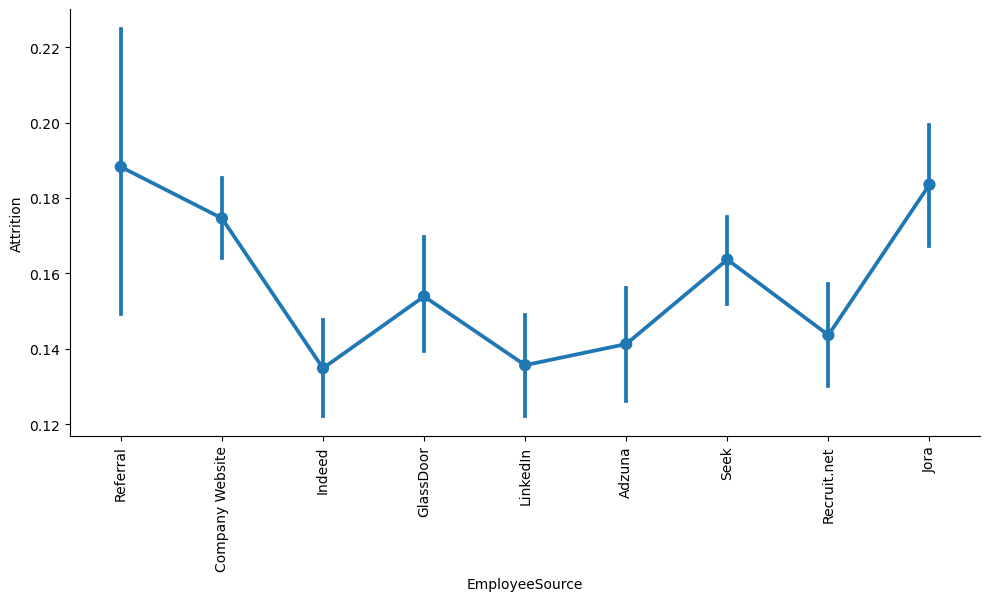

In [44]:
sns.catplot(x='EmployeeSource',y='Attrition',data=data,kind='point',aspect=2).set_xticklabels(rotation=90);

### Analysis of Gender column

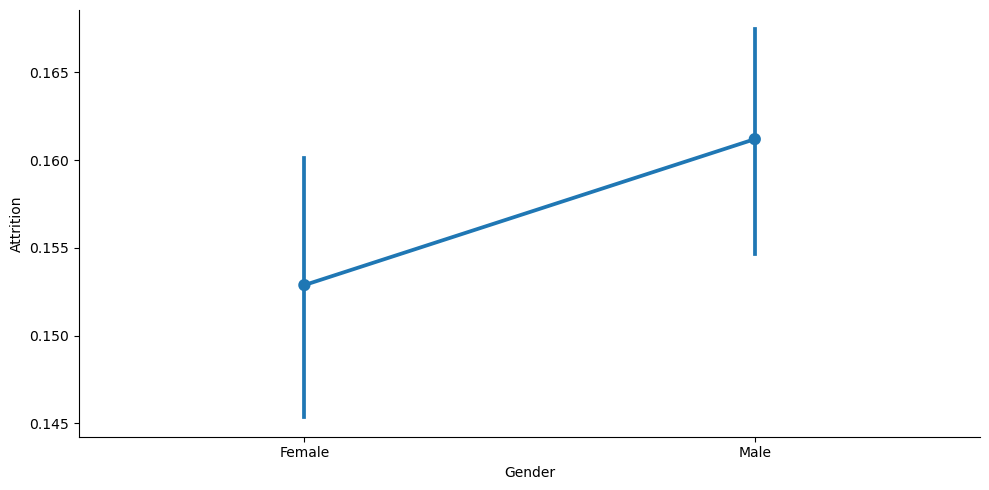

In [45]:
sns.catplot(x='Gender',y='Attrition',data=data,kind='point',aspect=2);

 We can say that gender doesn't have much effect on attrition.

### Analysis of Job Involvement and Job Satisfaction

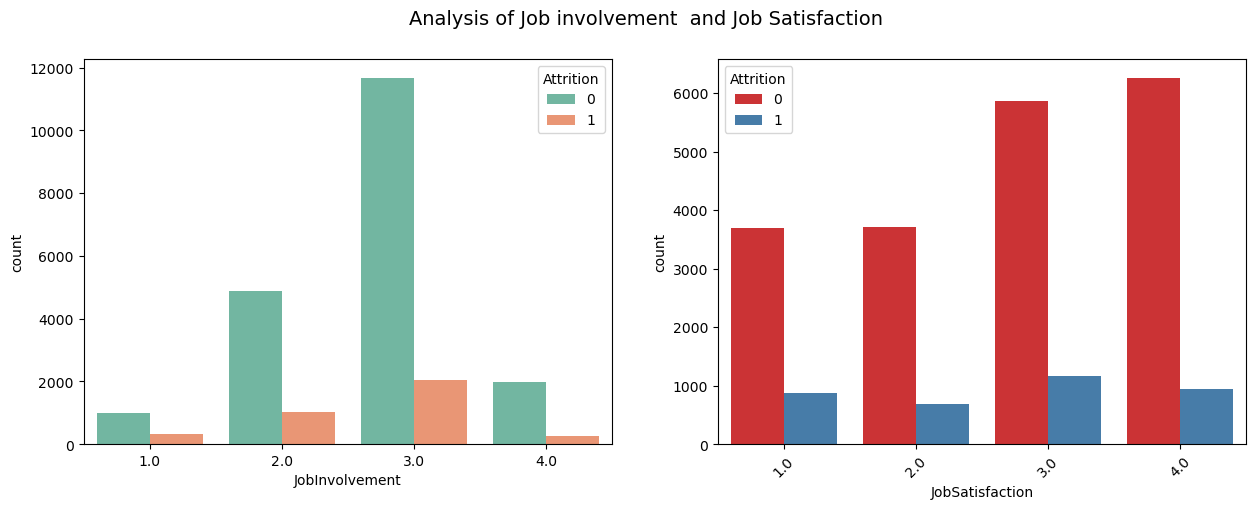

In [46]:
plt.figure(figsize=(15,5))
plt.suptitle('Analysis of Job involvement  and Job Satisfaction',fontsize=14)
plt.subplot(1,2,1)
sns.countplot(x='JobInvolvement',data=data,hue='Attrition',palette='Set2');
plt.subplot(1,2,2)
sns.countplot(x='JobSatisfaction',data=data,hue='Attrition',palette='Set1');
plt.xticks(rotation=45)
plt.show()

Employees with less Job involvement and less Job Satisfaction tends to leave the company.

### Analysis of Job Level and Job Role

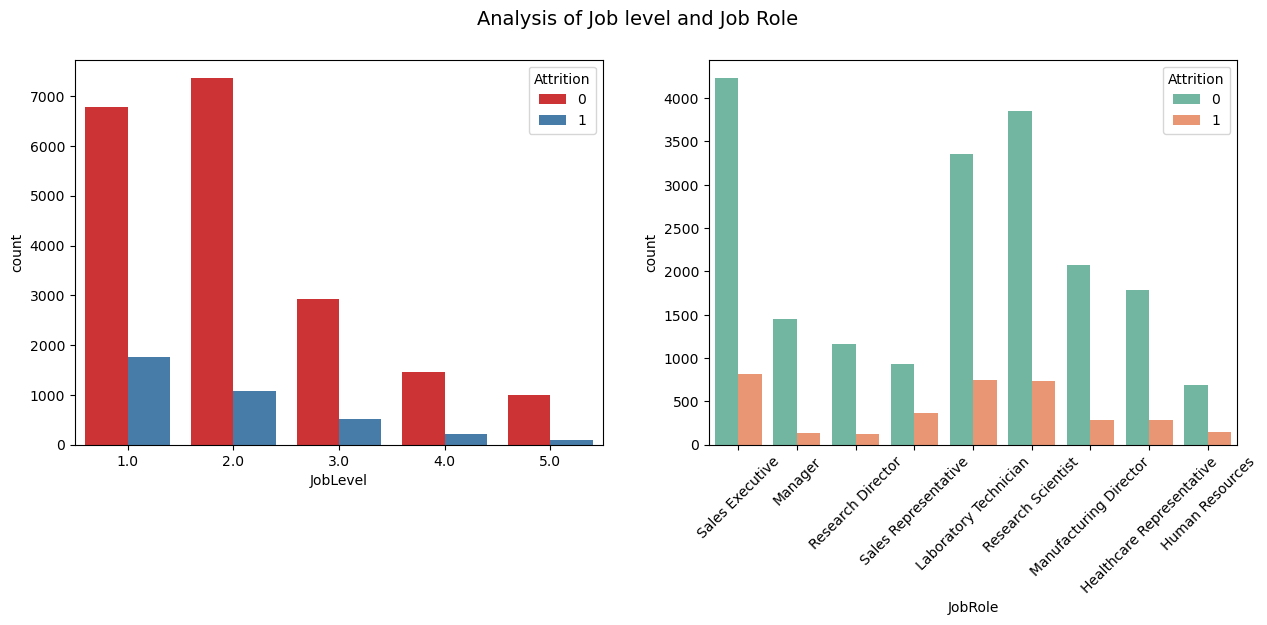

In [47]:
plt.figure(figsize=(15,5))
plt.suptitle('Analysis of Job level and Job Role',fontsize=14)
plt.subplot(1,2,1)
sns.countplot(x='JobLevel',data=data,hue='Attrition',palette='Set1');
plt.subplot(1,2,2)
sns.countplot(x='JobRole',data=data,hue='Attrition',palette='Set2');
plt.xticks(rotation=45)
plt.show()

Employees in Job level 1 and Sales representative category tend to leave the company more.

### Analysis of Marital Status

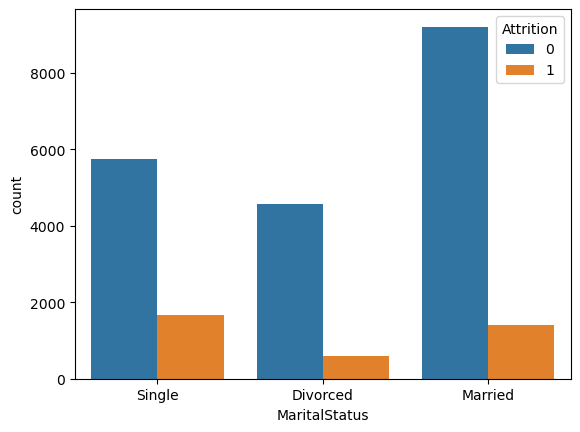

In [48]:
sns.countplot(x='MaritalStatus',data=data,hue='Attrition');

Employees in Single category show high attrition as compared to others.

### Analysis of Monthly Income

<Figure size 1200x800 with 0 Axes>

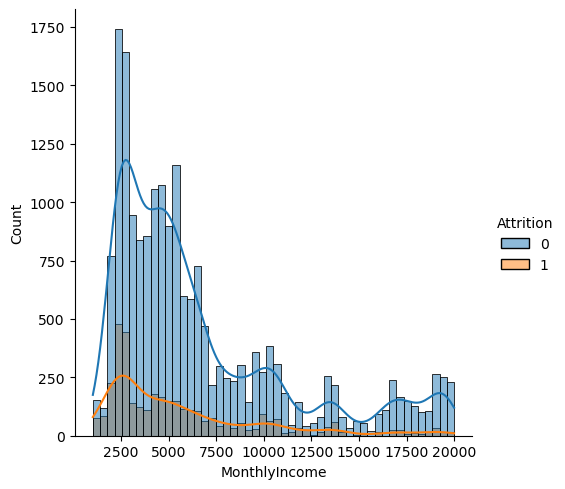

In [49]:
plt.figure(figsize=(12,8))
sns.displot(data=data,x='MonthlyIncome',hue='Attrition',kde=True);

The employees with low monthly income show high attrition.

### Analysis of Over Time

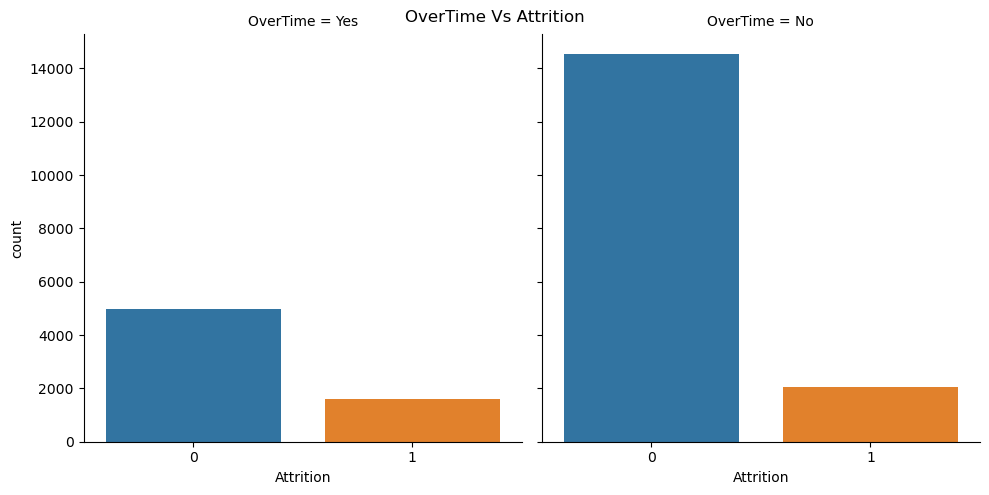

In [50]:
# Plot out the counts of OverTime
sns.factorplot("Attrition", col="OverTime", data=data, kind="count", col_wrap=2, size=5)
plt.suptitle('OverTime Vs Attrition')
plt.show()

The employees who work over time leaves the company than, those who don't have to.

### Analysis of Percent Salary Hike, Performance Rating and Relationship Satisfaction

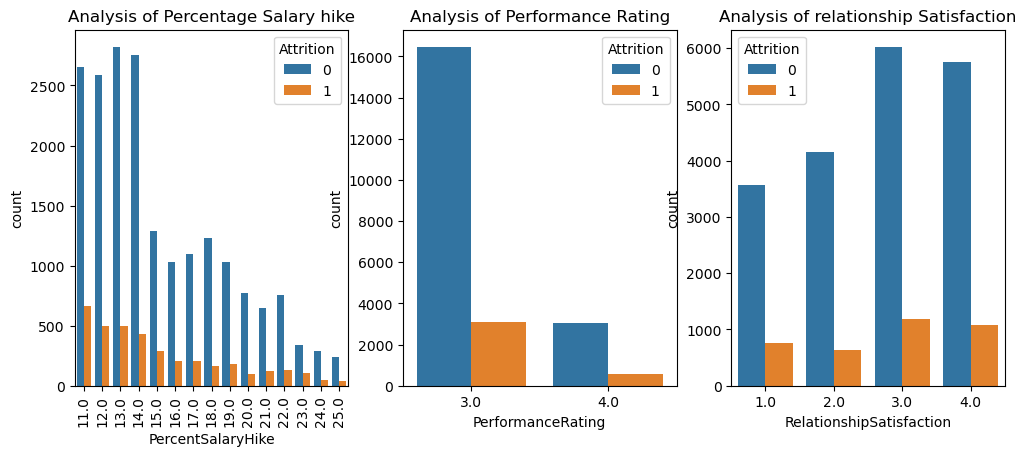

In [51]:
fig=plt.figure(figsize=(12,4))
fig.tight_layout(h_pad=2)
plt.subplots_adjust(top=1)
plt.subplot(1,3,1)
sns.countplot(x='PercentSalaryHike',data=data,hue='Attrition');
plt.title('Analysis of Percentage Salary hike')
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.countplot(x='PerformanceRating',data=data,hue='Attrition');
plt.title('Analysis of Performance Rating')
plt.subplot(1,3,3)
sns.countplot(x='RelationshipSatisfaction',data=data,hue='Attrition');
plt.title('Analysis of relationship Satisfaction');

Performance rating has not much effect on attrition.Employees with low relationship satisfaction show high attrition. Percent Salary Hike will be determined different factors.

### Analysis of Stock Option Level

In [52]:
att_gen = data.groupby(['StockOptionLevel','Attrition']).size().unstack('Attrition')
att_gen

Attrition,0,1
StockOptionLevel,,
0.0,7809,2128
1.0,8366,1038
2.0,2234,283
3.0,1115,211


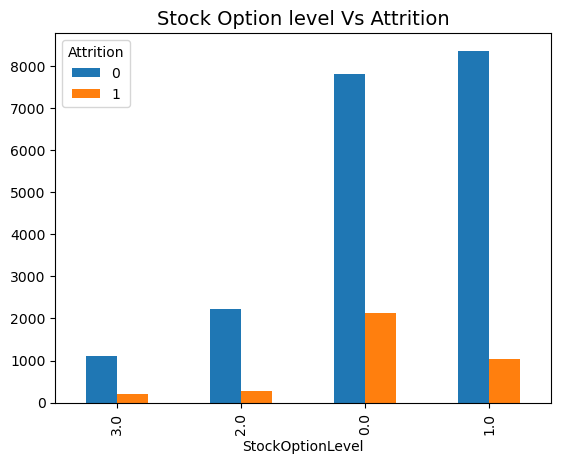

In [53]:
att_gen.sort_values([0,1])[[0,1]].head().plot(kind='bar')
plt.title('Stock Option level Vs Attrition',fontsize=14)
plt.show()

Stock option level shows some effect on attrition.The number of resignated employee without stock is higher compared to number of employee with stock.

### Analysis of Total Working Years

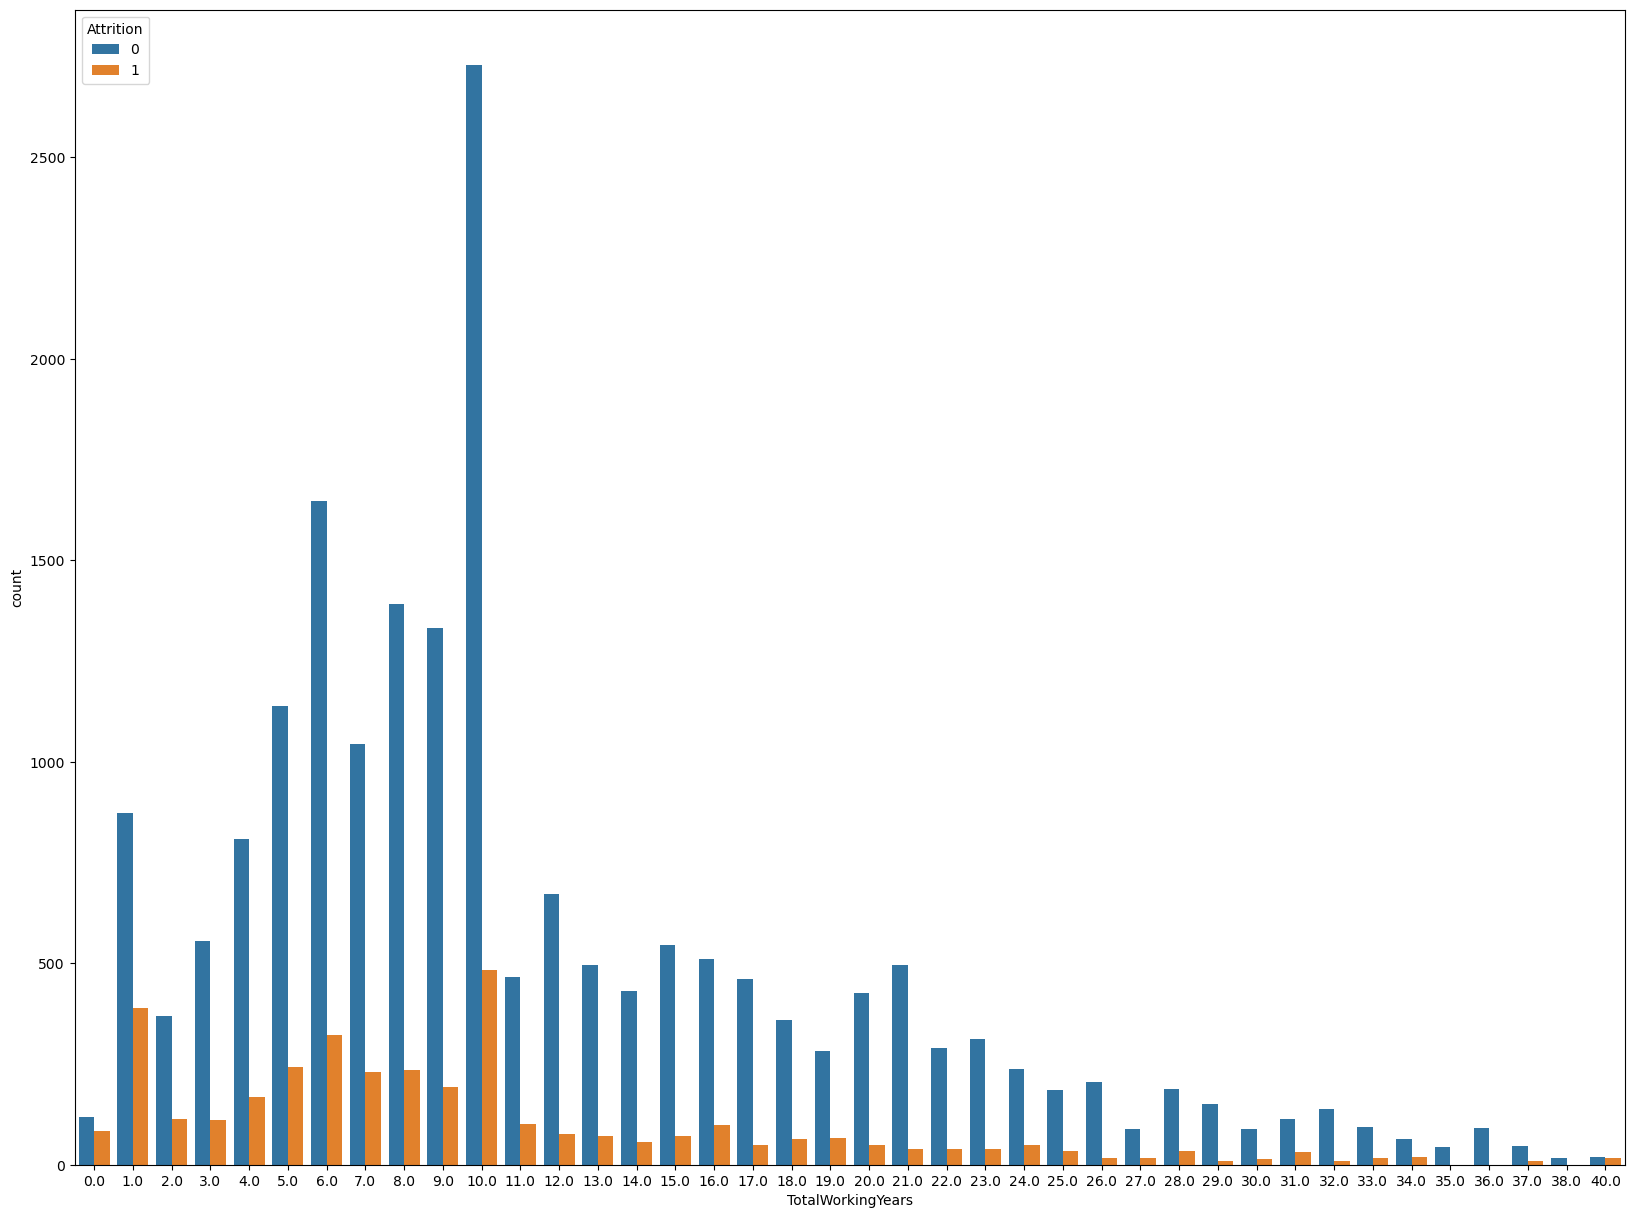

In [54]:
plt.figure(figsize=(20,15))
sns.countplot(x='TotalWorkingYears',data=data,hue='Attrition');

Employees with low work experience show more attrition.

### Analysis of Years at Company

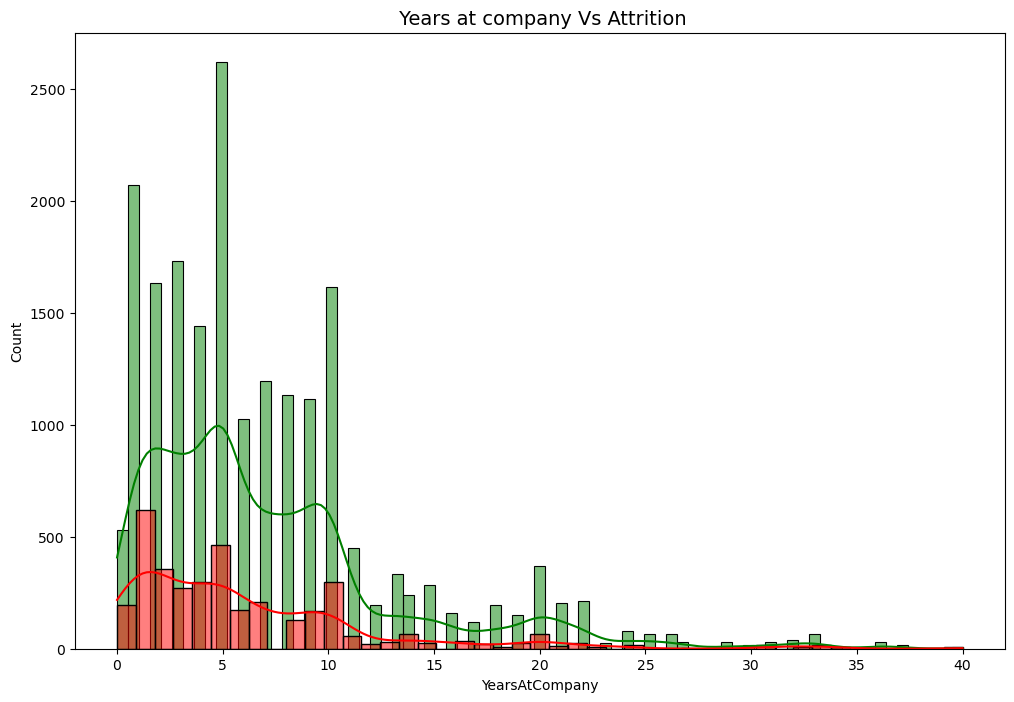

In [55]:
# Plot the distribution of Years at Company by Attrition
plt.figure(figsize=(12,8))
plt.title(' Years at company Vs Attrition',fontsize=14)
sns.histplot(data.YearsAtCompany[data.Attrition == 0],color='Green',kde=True)
sns.histplot(data.YearsAtCompany[data.Attrition == 1],color='Red',kde=True)
plt.show()

The attrition rate increases as the experience reaches maximum. Which is expected as employees get aged.

### Analysis of Columns Listed below

In [56]:
col_3 = ['TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

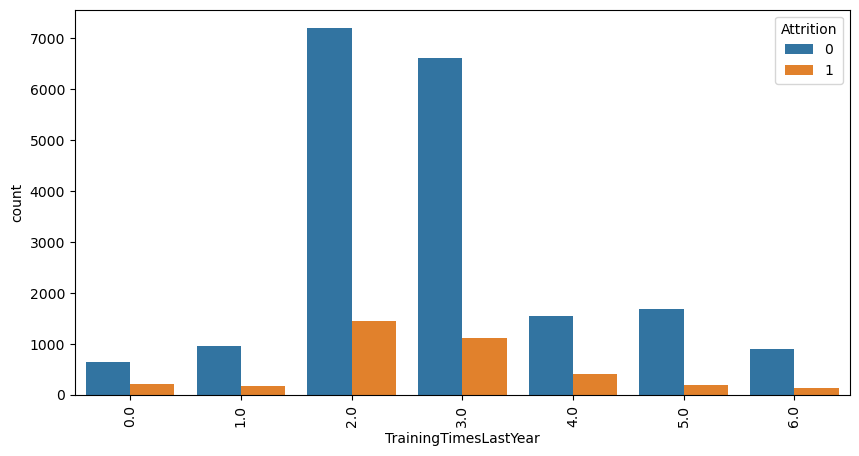

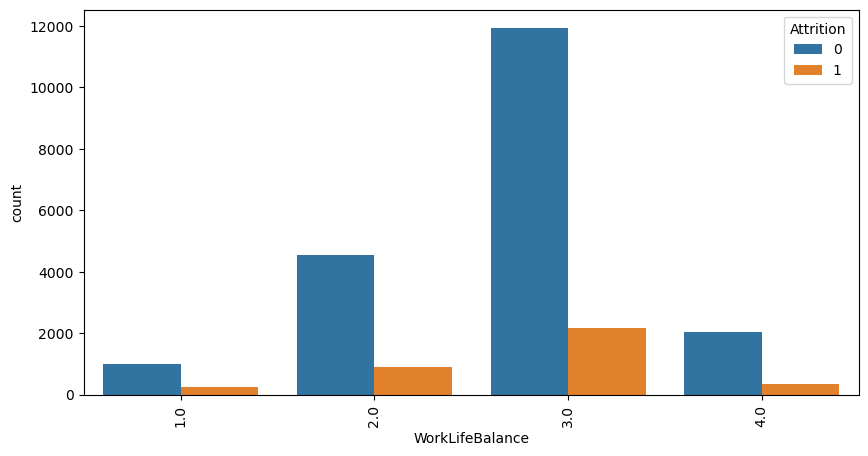

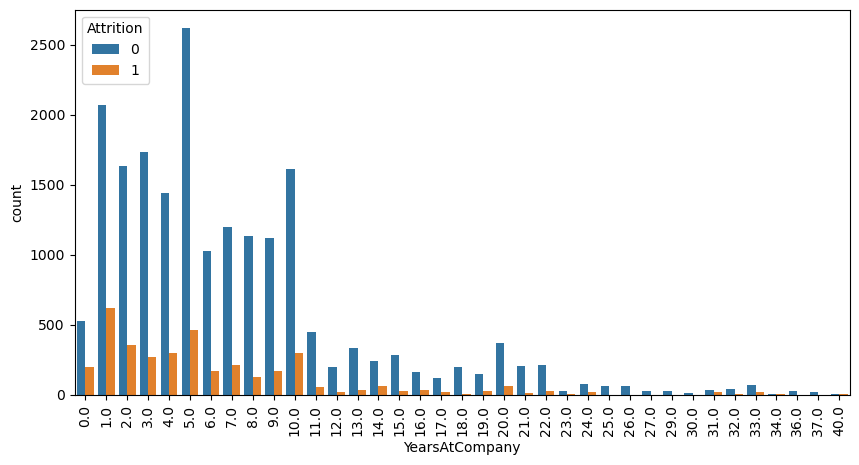

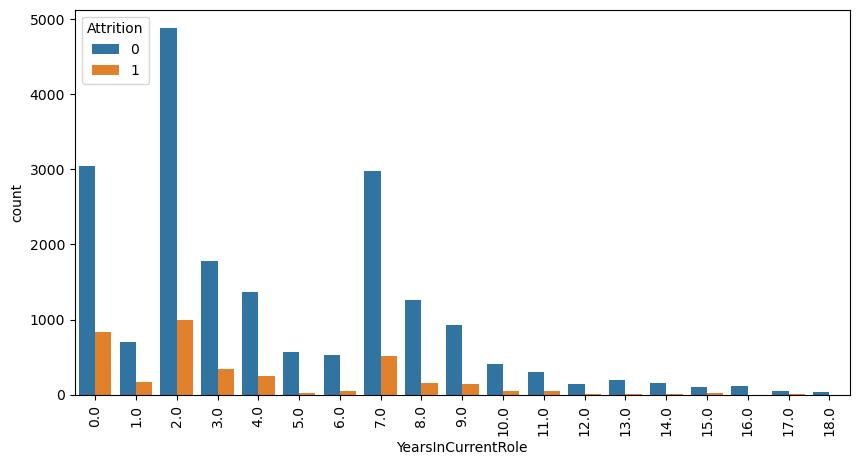

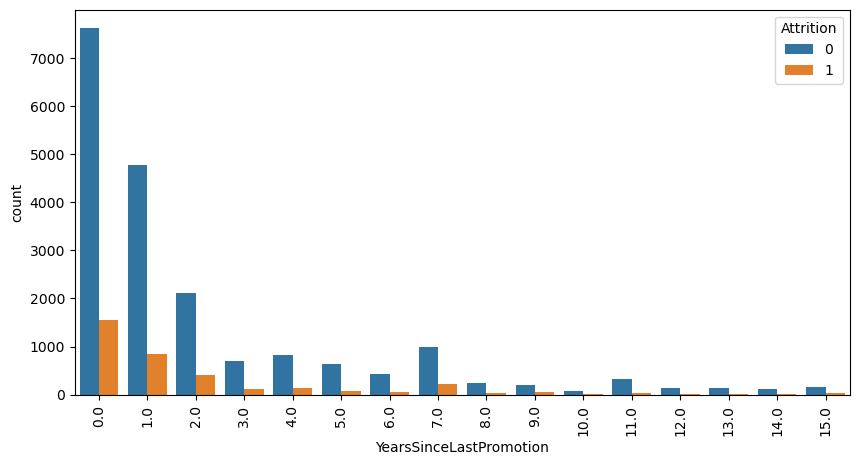

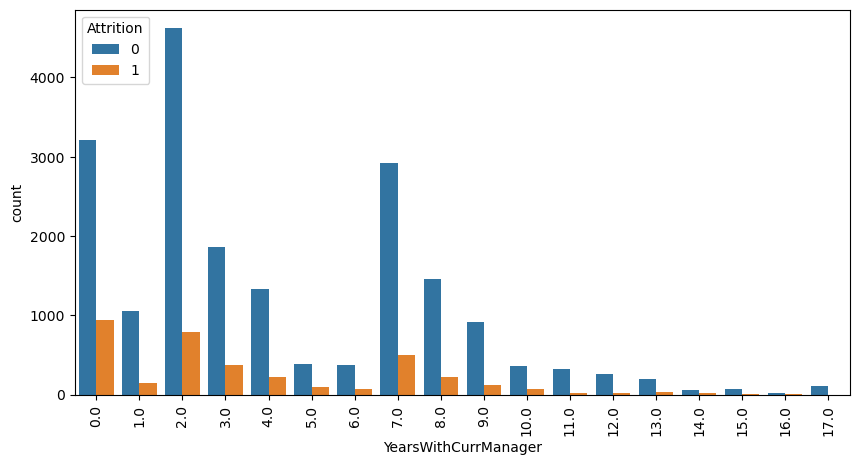

In [57]:
for i in col_3:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i,data=data,hue='Attrition');
    plt.xticks(rotation=90)

Employees with less work life balance and experience shows tendency to leave the company.

### Effect of Job Role and Monthly Income on Attrition

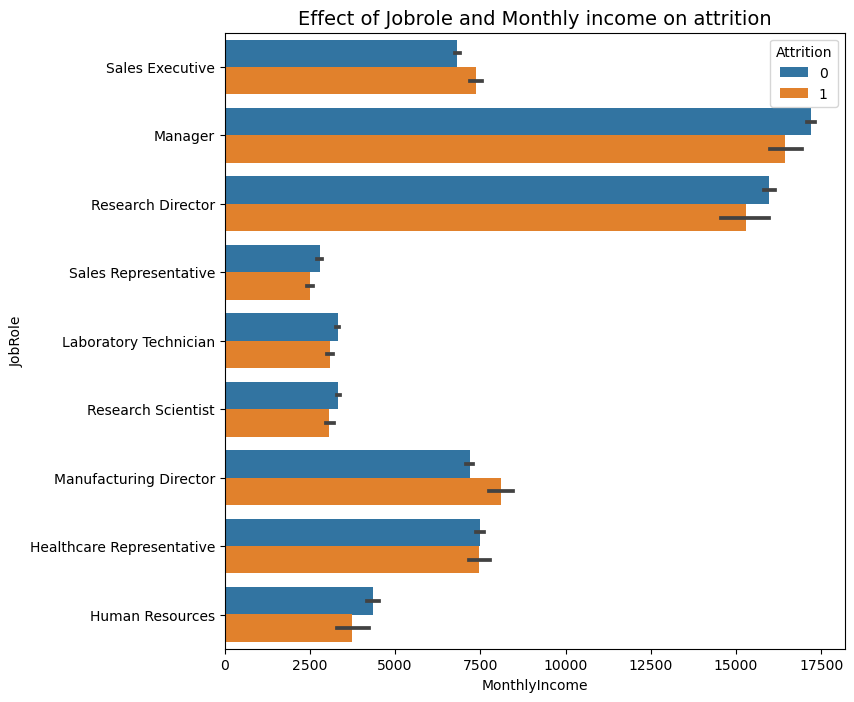

In [58]:
# checking effect of jobrole and monthly income on attrition
fig = plt.subplots(figsize = (8,8))
sns.barplot(y = 'JobRole',x = 'MonthlyIncome',hue = 'Attrition',data = data)
plt.title('Effect of Jobrole and Monthly income on attrition',fontsize=14)
plt.show()

Except for Sales Executive and Manufacturing Director the monthly income is low for resignated employees as compared to current employees. The monthly income doesn't have much impact on attrition.

### Analysis of Total Working Years and Monthly Income based on Attrition

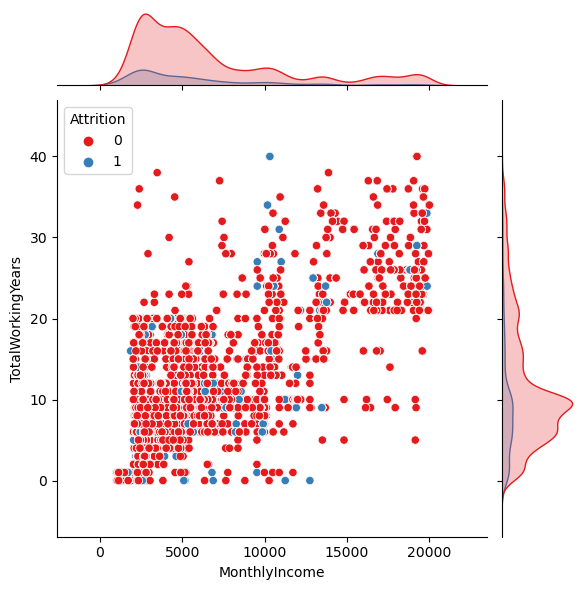

In [59]:
sns.jointplot(
    data=data,
    x="MonthlyIncome", y="TotalWorkingYears", hue="Attrition",
    kind="scatter",palette="Set1",)
plt.show()

As observed earlier the number of employees leaving the company is higher both at the begining of their career and towards the end. Monthly income and the experience have a linear relationship. And the attrition in between may be influenced by other factors too.

### Environment Satisfaction Vs Number of Companies

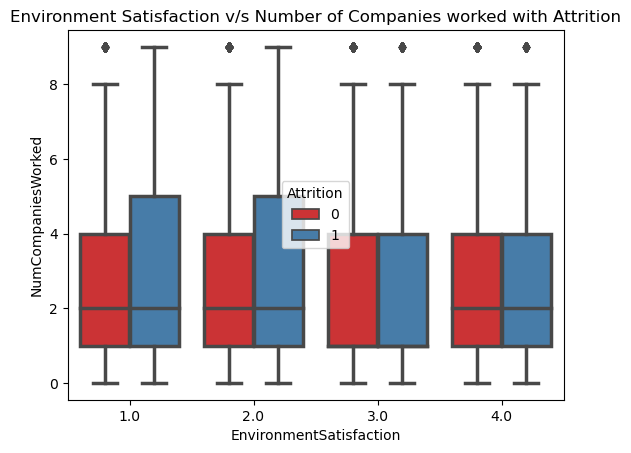

In [60]:
# To check environment satifaction has any effect on attrition
sns.boxplot(x=data['EnvironmentSatisfaction'],y=data['NumCompaniesWorked'],hue=data['Attrition'],palette="Set1",linewidth=2.5)
plt.title('Environment Satisfaction v/s Number of Companies worked with Attrition')
plt.show()

 The boxplot reveals the employees with less environment satisfaction leaves the company and also these people worked in more companies

### Performance Rating Vs Percent salary hike

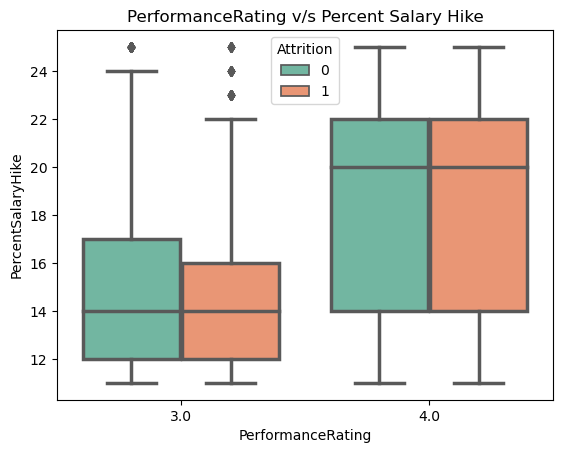

In [61]:
sns.boxplot(x=data['PerformanceRating'],y=data['PercentSalaryHike'],hue=data['Attrition'],palette="Set2",linewidth=2.5)
plt.xticks(rotation=0)
plt.title('PerformanceRating v/s Percent Salary Hike')
plt.show()

The Employees with less performance rating has less salary hike and more attrition.
Higher the Performance rating higher the percent salary hike.

### Total Working Years Vs Years Since Last Promotion

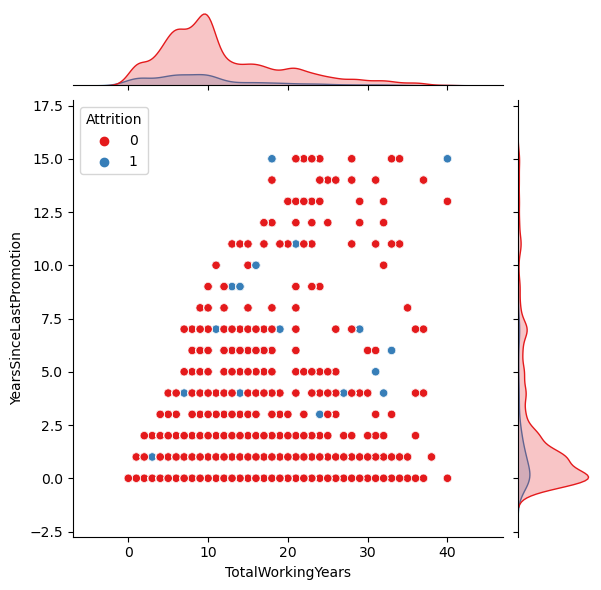

In [62]:
sns.jointplot(
    data=data,
    x="TotalWorkingYears", y="YearsSinceLastPromotion", hue="Attrition",
    kind="scatter",palette="Set1",)
plt.show()

The employee with more work experience have more years since last promotion.

### Relationship Satisfaction Vs Years With Current Manager

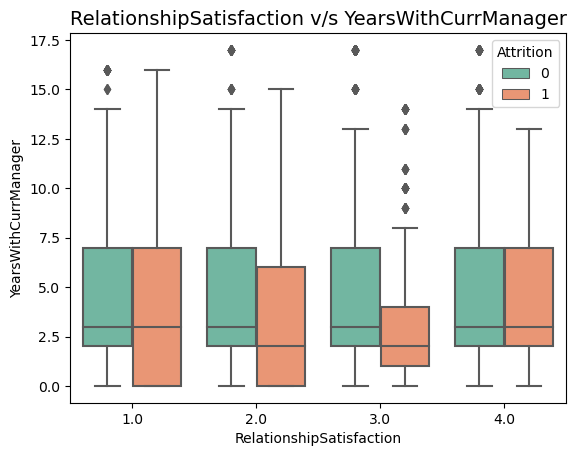

In [63]:
sns.boxplot(
    data=data,
    x="RelationshipSatisfaction", y="YearsWithCurrManager", hue="Attrition",palette="Set2",)
plt.title('RelationshipSatisfaction v/s YearsWithCurrManager',fontsize=14)
plt.show()

 Employees with less relationship satisfaction has more attrition.But they also worked more with current manager

### Analysis of Stock Option level and Overtime on Attrition

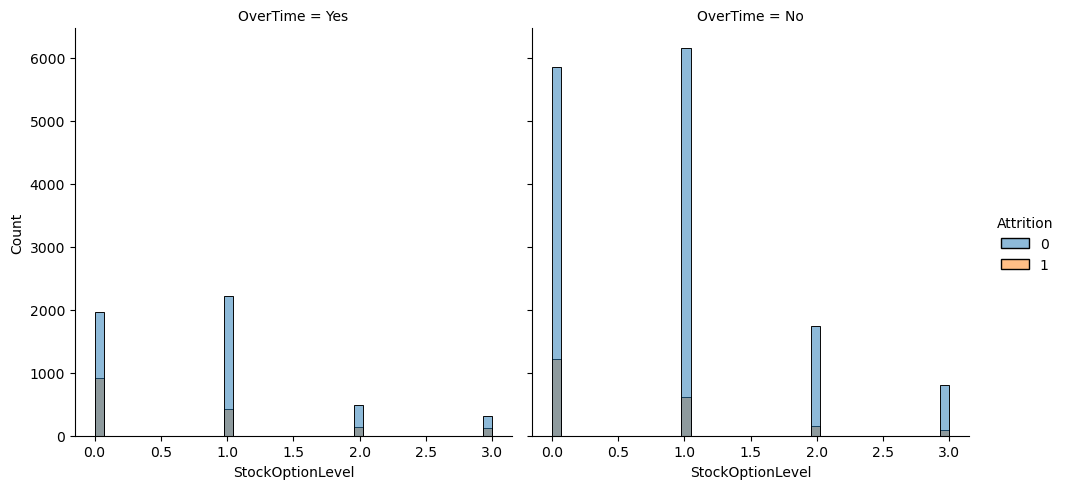

In [64]:
sns.displot(data = data, x = "StockOptionLevel", hue = "Attrition", col = "OverTime");

Even if Stock option level is high those employees who worked overtime have more tendency to leave the company.

#### Analysis of Percent Salary hike and Overtime on Attrition

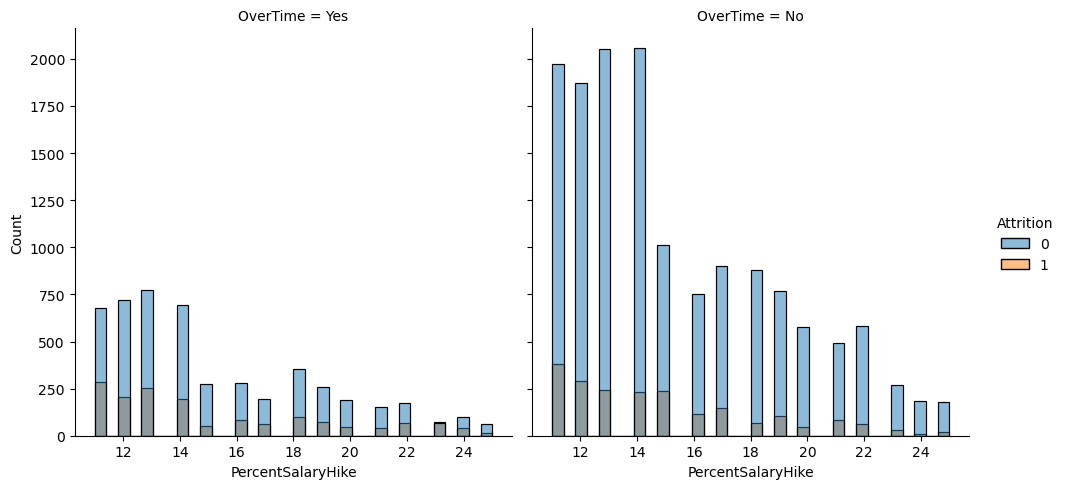

In [65]:
sns.displot(data = data, x = "PercentSalaryHike", hue = "Attrition", col = "OverTime");

From the above displot we reach the conclusion that overtime didn't have a positive impact on salary hike. These employees might be forced to do work overtime due to their low performance. Hence the attrition rate of those categories are high.

### Analysis of daily rate

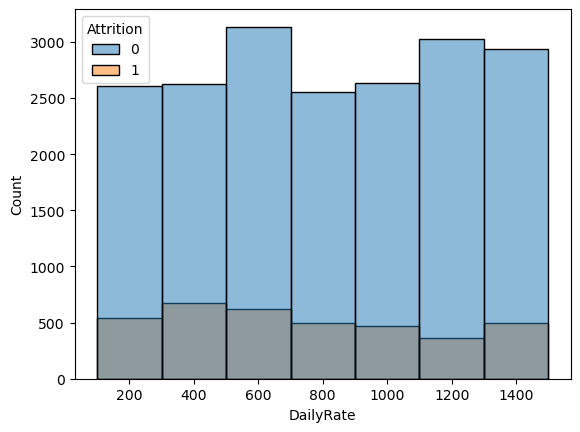

In [66]:
sns.histplot(data = data, x = "DailyRate", hue = "Attrition", bins = 7);

The attrition rate is decreasing as the daily rate increases.

### Analysis of Monthly Rate

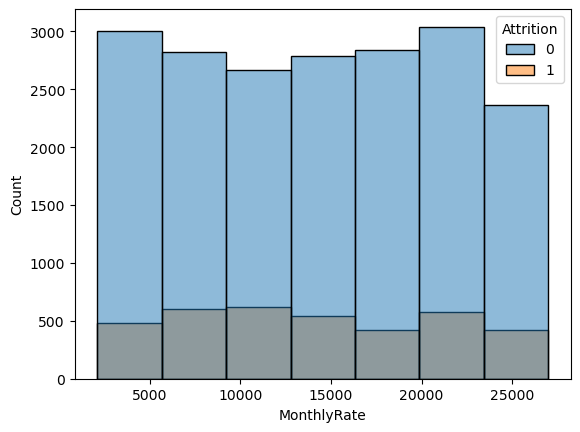

In [67]:
sns.histplot(data = data, x = "MonthlyRate", hue = "Attrition", bins = 7);

The variations in attrition w.r.t monthly rate is varying a little bit. This may arise due to others factors also.

There are variables with high correlation that leads to multicollinearity.
In the productive phase of their life epmloyees of age category from 20-30 shows high attrition.
Larger commutation time have strong effect on attrition rate .
Employees with less job satisfaction and environment satisfaction tends to leave the company.
Gender doesn't have a significant role in Attrition.
Low skilled jobs shows high attrition rate.
Eployees with low monthly income shows more tendency to leave the company, low income is directly related to low experience and performance.
In the first phase of their career employees tends to switch to other companies in search of better opportunities.
Overtime is directly related to low performance and thus to low percentage hike in salary.
Stock Option level is definetly a deciding factor at lower levels.But at higherstock option level attrition rates will be influenced by other factors too.


In [68]:
# checking the average income of employees in each department for those who left and those who continued
dpt_avg_income=data.groupby(['Department','Attrition']).agg({'MonthlyIncome':['mean']})
dpt_avg_income

MonthlyIncome
                                          mean
Department             Attrition              
Human Resources        0           6839.701583
                       1           4605.175532
Research & Development 0           6551.839920
                       1           5232.101520
Sales                  0           6900.757382
                       1           6433.465457

#### Detailed analysis of Attrition w.r.t Age

In [69]:
age_fltr=data[(data.Age>=22)&(data.Age<=50)]

In [70]:
age_atr=data.groupby(['Department','Attrition']).agg({'PercentSalaryHike':'mean'})
age_atr

PercentSalaryHike
Department             Attrition                   
Human Resources        0                  15.291108
                       1                  13.712766
Research & Development 0                  15.293403
                       1                  15.059833
Sales                  0                  15.158662
                       1                  15.082345

## **Preprocessing**

In [71]:
# Reading the saved dataset for Preprocessing
ibm_data_cleaned=pd.read_csv('IBM_HR_Data_cleaned.csv')

In [72]:
# viewing dataset
data=ibm_data_cleaned
data.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,ApplicationID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeSource,Age
0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1,123456.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,8.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
1,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1,123458.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,4.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
2,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,7,123462.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,8.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
3,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,8,123463.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,4.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
4,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,9,123464.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,8.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0


In [73]:
# Displaying column names
data.columns

Index(['Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'ApplicationID', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EmployeeSource',
       'Age'],
      dtype='object')

In [74]:
# dropping single valued columns /invariability in data point
data_pre=data.drop(['EmployeeCount','Over18','StandardHours'],axis=1)

In [75]:
# checking null values
data_pre.isnull().sum()

Attrition                   13
BusinessTravel               8
DailyRate                   11
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeNumber               0
ApplicationID                3
EnvironmentSatisfaction      8
Gender                       9
HourlyRate                   8
JobInvolvement               8
JobLevel                     6
JobRole                      8
JobSatisfaction              8
MaritalStatus               10
MonthlyIncome               12
MonthlyRate                 10
NumCompaniesWorked           8
OverTime                    11
PercentSalaryHike           13
PerformanceRating            9
RelationshipSatisfaction     7
StockOptionLevel             8
TotalWorkingYears            7
TrainingTimesLastYear       10
WorkLifeBalance              9
YearsAtCompany              12
YearsInCurrentRole          14
YearsSinceLastPromotion     10
YearsWithCurrManager         6
Employee

In [76]:
#dropping null values in dataset
data_pre=data_pre.dropna()
data_pre.reset_index(inplace=True)
data_pre=data_pre.drop('index',axis=1)

In [77]:
# Dispalying the number of unique values in each column
data_pre.nunique()

Attrition                       2
BusinessTravel                  3
DailyRate                     883
Department                      3
DistanceFromHome               29
Education                       5
EducationField                  6
EmployeeNumber              23147
ApplicationID               23196
EnvironmentSatisfaction         4
Gender                          2
HourlyRate                     71
JobInvolvement                  4
JobLevel                        5
JobRole                         9
JobSatisfaction                 4
MaritalStatus                   3
MonthlyIncome                1349
MonthlyRate                  1427
NumCompaniesWorked             10
OverTime                        2
PercentSalaryHike              15
PerformanceRating               2
RelationshipSatisfaction        4
StockOptionLevel                4
TotalWorkingYears              40
TrainingTimesLastYear           7
WorkLifeBalance                 4
YearsAtCompany                 37
YearsInCurrent

In [78]:
# dropping Employee Number as it contains all unique values, keeping Application ID for identification purpose
data_pre=data_pre.drop(['EmployeeNumber','ApplicationID'],axis=1)

In [79]:
# Dropping columns based on correlation value
data_pre=data_pre.drop(['JobLevel','YearsWithCurrManager'],axis=1)

In [80]:
# Dropping columns with similar information
data_pre=data_pre.drop(['DailyRate','HourlyRate','MonthlyRate'],axis=1)

In [81]:
data_pre.duplicated().sum()

14941

In [82]:
data_pre.drop_duplicates(keep='first',inplace=True)

In [83]:
data_pre.shape

(8255, 27)

In [84]:
# Label encoding Attrition
from sklearn import preprocessing
lable_encd=preprocessing.LabelEncoder()
data_pre['Attrition']=lable_encd.fit_transform(data_pre['Attrition'])
data_pre

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,EmployeeSource,Age
0,1,Travel_Rarely,Sales,1.0,2.0,Life Sciences,2.0,Female,3.0,Sales Executive,4.0,Single,5993.0,8.0,Yes,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,Referral,41.0
1,1,Travel_Rarely,Sales,1.0,2.0,Life Sciences,2.0,Female,3.0,Sales Executive,4.0,Single,5993.0,4.0,Yes,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,Referral,41.0
5,1,Travel_Rarely,Sales,1.0,2.0,Life Sciences,4.0,Female,3.0,Manager,3.0,Divorced,14756.0,2.0,Yes,14.0,3.0,3.0,3.0,21.0,2.0,3.0,5.0,0.0,0.0,Company Website,41.0
6,1,Travel_Rarely,Sales,1.0,2.0,Life Sciences,1.0,Female,3.0,Manager,1.0,Married,19566.0,5.0,No,11.0,3.0,4.0,0.0,33.0,5.0,1.0,29.0,8.0,11.0,Indeed,41.0
10,1,Travel_Rarely,Sales,1.0,2.0,Life Sciences,1.0,Male,3.0,Sales Executive,2.0,Married,6825.0,0.0,No,11.0,3.0,4.0,1.0,10.0,2.0,3.0,9.0,7.0,4.0,Company Website,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23183,0,Travel_Rarely,Research & Development,1.0,4.0,Life Sciences,4.0,Female,3.0,Research Director,2.0,Married,16413.0,1.0,No,16.0,3.0,2.0,2.0,27.0,2.0,3.0,4.0,2.0,1.0,Jora,60.0
23188,0,Travel_Rarely,Research & Development,1.0,4.0,Medical,3.0,Male,1.0,Healthcare Representative,4.0,Divorced,10883.0,3.0,No,20.0,3.0,3.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,Company Website,60.0
23189,0,Travel_Rarely,Research & Development,1.0,4.0,Life Sciences,3.0,Male,1.0,Healthcare Representative,4.0,Divorced,10883.0,0.0,No,20.0,3.0,3.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,Company Website,60.0
23190,0,Travel_Rarely,Research & Development,1.0,4.0,Medical,3.0,Male,1.0,Healthcare Representative,4.0,Single,10883.0,3.0,No,20.0,4.0,3.0,1.0,20.0,2.0,3.0,20.0,7.0,2.0,Company Website,60.0


In [85]:
# saving the columns of object dtype to list
objlist=data_pre.select_dtypes(include="object").columns
print(objlist)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'EmployeeSource'],
      dtype='object')


In [86]:
# label encoding columns od object dtype
for feat in objlist:
    data_pre[feat]=lable_encd.fit_transform(data_pre[feat].astype(str))
data_pre

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,EmployeeSource,Age
0,1,2,2,1.0,2.0,1,2.0,0,3.0,7,4.0,2,5993.0,8.0,1,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,7,41.0
1,1,2,2,1.0,2.0,1,2.0,0,3.0,7,4.0,2,5993.0,4.0,1,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,7,41.0
5,1,2,2,1.0,2.0,1,4.0,0,3.0,3,3.0,0,14756.0,2.0,1,14.0,3.0,3.0,3.0,21.0,2.0,3.0,5.0,0.0,0.0,1,41.0
6,1,2,2,1.0,2.0,1,1.0,0,3.0,3,1.0,1,19566.0,5.0,0,11.0,3.0,4.0,0.0,33.0,5.0,1.0,29.0,8.0,11.0,3,41.0
10,1,2,2,1.0,2.0,1,1.0,1,3.0,7,2.0,1,6825.0,0.0,0,11.0,3.0,4.0,1.0,10.0,2.0,3.0,9.0,7.0,4.0,1,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23183,0,2,1,1.0,4.0,1,4.0,0,3.0,5,2.0,1,16413.0,1.0,0,16.0,3.0,2.0,2.0,27.0,2.0,3.0,4.0,2.0,1.0,4,60.0
23188,0,2,1,1.0,4.0,3,3.0,1,1.0,0,4.0,0,10883.0,3.0,0,20.0,3.0,3.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,1,60.0
23189,0,2,1,1.0,4.0,1,3.0,1,1.0,0,4.0,0,10883.0,0.0,0,20.0,3.0,3.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,1,60.0
23190,0,2,1,1.0,4.0,3,3.0,1,1.0,0,4.0,2,10883.0,3.0,0,20.0,4.0,3.0,1.0,20.0,2.0,3.0,20.0,7.0,2.0,1,60.0


In [87]:
# Saving the dataset before scaling to another file
data_pre.to_csv('IBM_HR_Data_pre_noscale.csv',index=False)# index =False is used to not to give index as a clmn

In [88]:
data_mm=data_pre

In [89]:
# Standard Scaling the data
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
cols=['Age','DistanceFromHome','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion']
for col in cols:
    data_pre[[col]]=scalar.fit_transform(data_pre[[col]])

In [90]:
data_pre

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,EmployeeSource,Age
0,1,2,2,-1.017343,2.0,1,2.0,0,3.0,7,4.0,2,5993.0,8.0,1,-1.183499,3.0,1.0,0.0,-0.398489,-2.166374,1.0,-0.147297,-0.049441,-0.672279,7,0.491078
1,1,2,2,-1.017343,2.0,1,2.0,0,3.0,7,4.0,2,5993.0,4.0,1,-1.183499,3.0,1.0,0.0,-0.398489,-2.166374,1.0,-0.147297,-0.049441,-0.672279,7,0.491078
5,1,2,2,-1.017343,2.0,1,4.0,0,3.0,3,3.0,0,14756.0,2.0,1,-0.417822,3.0,3.0,3.0,1.262824,-0.614398,3.0,-0.312259,-1.154751,-0.672279,1,0.491078
6,1,2,2,-1.017343,2.0,1,1.0,0,3.0,3,1.0,1,19566.0,5.0,0,-1.183499,3.0,4.0,0.0,2.796343,1.713566,1.0,3.646831,1.055869,2.785065,3,0.491078
10,1,2,2,-1.017343,2.0,1,1.0,1,3.0,7,2.0,1,6825.0,0.0,0,-1.183499,3.0,4.0,1.0,-0.142902,-0.614398,3.0,0.347589,0.779542,0.584937,1,0.491078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23183,0,2,1,-1.017343,4.0,1,4.0,0,3.0,5,2.0,1,16413.0,1.0,0,0.092629,3.0,2.0,2.0,2.029583,-0.614398,3.0,-0.477221,-0.602096,-0.357975,4,2.502443
23188,0,2,1,-1.017343,4.0,3,3.0,1,1.0,0,4.0,0,10883.0,3.0,0,1.113533,3.0,3.0,1.0,1.007237,-0.614398,4.0,-0.972107,-1.154751,-0.672279,1,2.502443
23189,0,2,1,-1.017343,4.0,1,3.0,1,1.0,0,4.0,0,10883.0,0.0,0,1.113533,3.0,3.0,1.0,1.007237,-0.614398,4.0,-0.972107,-1.154751,-0.672279,1,2.502443
23190,0,2,1,-1.017343,4.0,3,3.0,1,1.0,0,4.0,2,10883.0,3.0,0,1.113533,4.0,3.0,1.0,1.135030,-0.614398,3.0,2.162172,0.779542,-0.043671,1,2.502443


In [91]:
# Saving the dataset after basic standard scaling 
data_pre.to_csv('IBM_HR_Data_pre_std.csv',index=False)# index =False is used to not to give index as a clmn

In [92]:
# Min Max  Scaling the data
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,10))
cols=['Age','DistanceFromHome','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion']
for col in cols:
    data_mm[[col]]=min_max_scaler.fit_transform(data_mm[[col]])

data_mm.head()

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,EmployeeSource,Age
0,1,2,2,0.0,2.0,1,2.0,0,3.0,7,4.0,2,2.624539,8.0,1,0.000000,3.0,1.0,0.0,2.00,0.000000,1.0,1.50,2.222222,0.000000,7,5.47619
1,1,2,2,0.0,2.0,1,2.0,0,3.0,7,4.0,2,2.624539,4.0,1,0.000000,3.0,1.0,0.0,2.00,0.000000,1.0,1.50,2.222222,0.000000,7,5.47619
5,1,2,2,0.0,2.0,1,4.0,0,3.0,3,3.0,0,7.239073,2.0,1,2.142857,3.0,3.0,3.0,5.25,3.333333,3.0,1.25,0.000000,0.000000,1,5.47619
6,1,2,2,0.0,2.0,1,1.0,0,3.0,3,1.0,1,9.771985,5.0,0,0.000000,3.0,4.0,0.0,8.25,8.333333,1.0,7.25,4.444444,7.333333,3,5.47619
10,1,2,2,0.0,2.0,1,1.0,1,3.0,7,2.0,1,3.062665,0.0,0,0.000000,3.0,4.0,1.0,2.50,3.333333,3.0,2.25,3.888889,2.666667,1,5.47619


In [93]:
# Saving the dataset after min max scaling
data_mm.to_csv('IBM_HR_Data_pre_minmax.csv',index=False)

## Modeling and Fine Tuning

#### Modeling Unscaled Dataset

In [94]:
# Reading the saved dataset for Modeling
data_model=pd.read_csv('IBM_HR_Data_pre_noscale.csv')
data_model.head()

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,EmployeeSource,Age
0,1,2,2,1.0,2.0,1,2.0,0,3.0,7,4.0,2,5993.0,8.0,1,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,7,41.0
1,1,2,2,1.0,2.0,1,2.0,0,3.0,7,4.0,2,5993.0,4.0,1,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,7,41.0
2,1,2,2,1.0,2.0,1,4.0,0,3.0,3,3.0,0,14756.0,2.0,1,14.0,3.0,3.0,3.0,21.0,2.0,3.0,5.0,0.0,0.0,1,41.0
3,1,2,2,1.0,2.0,1,1.0,0,3.0,3,1.0,1,19566.0,5.0,0,11.0,3.0,4.0,0.0,33.0,5.0,1.0,29.0,8.0,11.0,3,41.0
4,1,2,2,1.0,2.0,1,1.0,1,3.0,7,2.0,1,6825.0,0.0,0,11.0,3.0,4.0,1.0,10.0,2.0,3.0,9.0,7.0,4.0,1,41.0


In [95]:
# Splitting the dataset into feature and target
x=data_model.drop(['Attrition'],axis=1)
y=data_model['Attrition']

In [96]:
# assigning training and testing values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.3)

In [97]:
# importing libraries
from sklearn.linear_model  import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,f1_score,roc_auc_score,classification_report
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,StratifiedKFold,cross_val_score

In [98]:
# Table of Classification models used
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), SVC()]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM']

In [99]:
accuracy = []
roc_auc = []

for i in models:
    i.fit(x_train, y_train)
    y_pred = i.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_pred))

model_comparison = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy, 'ROC AUC': roc_auc})
model_comparison.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,ROC AUC
2,Random Forest,0.953977,0.868075
1,Decision Tree,0.920065,0.863763
3,KNN,0.840937,0.618114
4,SVM,0.830440,0.500000
0,Logistic Regression,0.828825,0.501870


In [100]:
# defining a fun to print results of fine tuning
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means=results.cv_results_['mean_test_score']
    stds=results.cv_results_['std_test_score']
    for mean,std, params in zip(means,stds,results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3),round(std*2,3),params))

In [101]:
# Best model using Logistic Regression
lr=LogisticRegression()
parameters = {
    'penalty': ['l2'], 
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}#'l1', 

cv=GridSearchCV(lr,parameters,cv=5)
cv.fit(x_train,y_train)

print('Logistic Regression Classifier')
print_results(cv)

Logistic Regression Classifier
BEST PARAMS: {'C': 1000, 'penalty': 'l2'}

0.841 (+/-0.001) for {'C': 0.001, 'penalty': 'l2'}
0.84 (+/-0.005) for {'C': 0.01, 'penalty': 'l2'}
0.84 (+/-0.003) for {'C': 0.1, 'penalty': 'l2'}
0.84 (+/-0.003) for {'C': 1, 'penalty': 'l2'}
0.84 (+/-0.004) for {'C': 10, 'penalty': 'l2'}
0.84 (+/-0.004) for {'C': 100, 'penalty': 'l2'}
0.841 (+/-0.002) for {'C': 1000, 'penalty': 'l2'}


In [102]:
# Best model using Decision Tree
dtc=DecisionTreeClassifier()
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

cv=GridSearchCV(dtc,parameters,cv=5)
cv.fit(x_train,y_train)

print('Decision Tree Classifier')
print_results(cv)

Decision Tree Classifier
BEST PARAMS: {'criterion': 'gini', 'max_depth': 10}

0.841 (+/-0.001) for {'criterion': 'gini', 'max_depth': 1}
0.841 (+/-0.007) for {'criterion': 'gini', 'max_depth': 2}
0.845 (+/-0.008) for {'criterion': 'gini', 'max_depth': 3}
0.845 (+/-0.009) for {'criterion': 'gini', 'max_depth': 4}
0.851 (+/-0.004) for {'criterion': 'gini', 'max_depth': 5}
0.853 (+/-0.013) for {'criterion': 'gini', 'max_depth': 6}
0.859 (+/-0.007) for {'criterion': 'gini', 'max_depth': 7}
0.869 (+/-0.006) for {'criterion': 'gini', 'max_depth': 8}
0.877 (+/-0.012) for {'criterion': 'gini', 'max_depth': 9}
0.882 (+/-0.019) for {'criterion': 'gini', 'max_depth': 10}
0.841 (+/-0.001) for {'criterion': 'entropy', 'max_depth': 1}
0.843 (+/-0.004) for {'criterion': 'entropy', 'max_depth': 2}
0.844 (+/-0.006) for {'criterion': 'entropy', 'max_depth': 3}
0.843 (+/-0.007) for {'criterion': 'entropy', 'max_depth': 4}
0.852 (+/-0.009) for {'criterion': 'entropy', 'max_depth': 5}
0.851 (+/-0.02) for {

In [103]:
# Best model using Random Forest
rf=RandomForestClassifier()
parameters = {
    'n_estimators': [10, 100, 1000],
    'max_features': ['auto', 'sqrt', 'log2']}

cv=GridSearchCV(rf,parameters,cv=5)
cv.fit(x_train,y_train)

print('Random Forest Classifier')
print_results(cv)

Random Forest Classifier
BEST PARAMS: {'max_features': 'sqrt', 'n_estimators': 1000}

0.922 (+/-0.012) for {'max_features': 'auto', 'n_estimators': 10}
0.937 (+/-0.019) for {'max_features': 'auto', 'n_estimators': 100}
0.937 (+/-0.019) for {'max_features': 'auto', 'n_estimators': 1000}
0.917 (+/-0.012) for {'max_features': 'sqrt', 'n_estimators': 10}
0.934 (+/-0.015) for {'max_features': 'sqrt', 'n_estimators': 100}
0.938 (+/-0.018) for {'max_features': 'sqrt', 'n_estimators': 1000}
0.92 (+/-0.018) for {'max_features': 'log2', 'n_estimators': 10}
0.934 (+/-0.019) for {'max_features': 'log2', 'n_estimators': 100}
0.936 (+/-0.017) for {'max_features': 'log2', 'n_estimators': 1000}


In [104]:
# Best model using KNN
kn=KNeighborsClassifier()
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
    
cv=GridSearchCV(kn,parameters,cv=5)
cv.fit(x_train,y_train)

print('KNN Classifier')
print_results(cv)

KNN Classifier
BEST PARAMS: {'n_neighbors': 1}

0.922 (+/-0.018) for {'n_neighbors': 1}
0.881 (+/-0.011) for {'n_neighbors': 2}
0.849 (+/-0.009) for {'n_neighbors': 3}
0.844 (+/-0.011) for {'n_neighbors': 4}
0.828 (+/-0.012) for {'n_neighbors': 5}
0.838 (+/-0.007) for {'n_neighbors': 6}
0.831 (+/-0.006) for {'n_neighbors': 7}
0.839 (+/-0.004) for {'n_neighbors': 8}
0.833 (+/-0.004) for {'n_neighbors': 9}
0.837 (+/-0.008) for {'n_neighbors': 10}


In [105]:
# Best model using SVM
sv=SVC()
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
##'kernel': ['linear'],,'rbf'
    

cv=GridSearchCV(sv,parameters,cv=5)
cv.fit(x_train,y_train)

print('SVM')
print_results(cv)

SVM
BEST PARAMS: {'C': 0.001}

0.841 (+/-0.001) for {'C': 0.001}
0.841 (+/-0.001) for {'C': 0.01}
0.841 (+/-0.001) for {'C': 0.1}
0.841 (+/-0.001) for {'C': 1}
0.841 (+/-0.001) for {'C': 10}
0.841 (+/-0.001) for {'C': 100}
0.841 (+/-0.001) for {'C': 1000}


In [106]:
# Table of hypertuned models

models = [LogisticRegression(C=0.1, penalty='l2'), DecisionTreeClassifier(criterion='gini', max_depth=10), RandomForestClassifier(max_features='sqrt', n_estimators=1000), KNeighborsClassifier(n_neighbors=1), SVC(C=0.001)]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVC']

accuracy = []
roc_auc = []

for i in models:
    i.fit(x_train, y_train)
    y_pred = i.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_pred))

model_comparison = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy, 'ROC AUC': roc_auc})
model_comparison.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,ROC AUC
2,Random Forest,0.953977,0.867128
3,KNN,0.947517,0.893556
1,Decision Tree,0.899071,0.758278
4,SVC,0.830440,0.500000
0,Logistic Regression,0.827210,0.498055


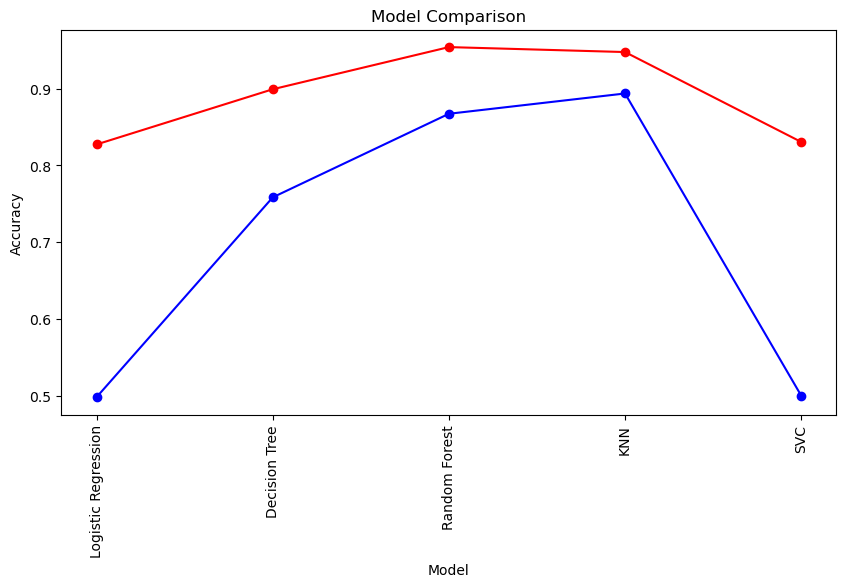

In [107]:
# model comparison

plt.figure(figsize=(10, 5))
plt.plot(model_comparison['Model'], model_comparison['Accuracy'], color='red', marker='o')
plt.plot(model_comparison['Model'], model_comparison['ROC AUC'], color='blue', marker='o')
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.show()

Accuracy of the model is : 0.9551877270892208
AUC ROC score of the model is: 0.8697519503669237


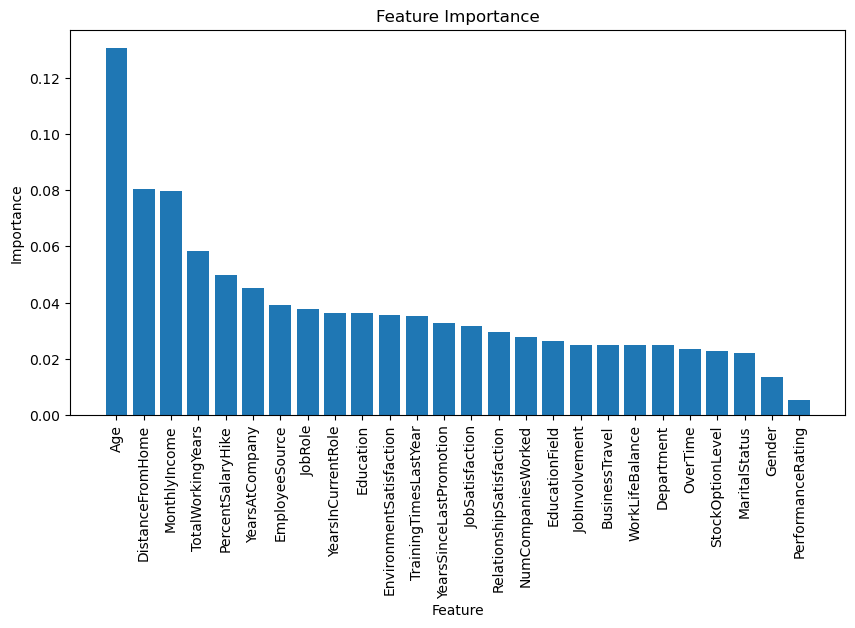

In [108]:
# feature importance plot RF Algorithm

model = RandomForestClassifier(max_features='sqrt', n_estimators=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy of the model is :',accuracy_score(y_test, y_pred))
print('AUC ROC score of the model is:',roc_auc_score(y_test, y_pred))

feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': model.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
feature_importance

plt.figure(figsize=(10, 5))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

In [109]:
# Final Model Results 
#  Random Forest

rf = RandomForestClassifier(max_features='sqrt', n_estimators=1000)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('ROC AUC Score: ', roc_auc_score(y_test, y_pred))

Accuracy Score:  0.9535728704077513
ROC AUC Score:  0.86783225686969


In [110]:
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n ', classification_report(y_test, y_pred))

Confusion Matrix: 
 [[2052    5]
 [ 110  310]]
Classification Report: 
                precision    recall  f1-score   support

           0       0.95      1.00      0.97      2057
           1       0.98      0.74      0.84       420

    accuracy                           0.95      2477
   macro avg       0.97      0.87      0.91      2477
weighted avg       0.96      0.95      0.95      2477



In [111]:
# Most risky employees
rf = RandomForestClassifier(max_features='sqrt', n_estimators=1000)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
y_pred_prob = rf.predict_proba(x_test)
y_pred_prob = y_pred_prob[:, 1]
y_pred_prob = pd.DataFrame(y_pred_prob)
y_pred_prob.columns = ['Probability']
y_pred_prob['Employee ID'] = x_test.index
y_pred_prob = y_pred_prob.sort_values(by='Probability', ascending=False)
y_pred_prob = y_pred_prob.reset_index(drop=True)
y_pred_prob.head(10)

,Probability,Employee ID
0,0.965,5499
1,0.955,6912
2,0.941,6151
3,0.921,5003
4,0.920,3624
5,0.914,2598
6,0.909,6889
7,0.904,1801
8,0.900,6779
9,0.896,3611


In [112]:
# Final dataset for model after feature reduction
data=data_model.drop(['BusinessTravel', 'Department', 'EducationField','Gender','JobInvolvement','JobSatisfaction',
                      'MaritalStatus','NumCompaniesWorked', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
                      'StockOptionLevel','TrainingTimesLastYear', 'WorkLifeBalance','YearsSinceLastPromotion',],axis=1)
data.head()

,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobRole,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,EmployeeSource,Age
0,1,1.0,2.0,2.0,7,5993.0,11.0,8.0,6.0,4.0,7,41.0
1,1,1.0,2.0,2.0,7,5993.0,11.0,8.0,6.0,4.0,7,41.0
2,1,1.0,2.0,4.0,3,14756.0,14.0,21.0,5.0,0.0,1,41.0
3,1,1.0,2.0,1.0,3,19566.0,11.0,33.0,29.0,8.0,3,41.0
4,1,1.0,2.0,1.0,7,6825.0,11.0,10.0,9.0,7.0,1,41.0


In [113]:
# Saving the dataset after feature reduction
# Saving the dataset before scaling to another file
data.to_csv('IBM_HR_Data_final.csv',index=False)# index =False is used to not to give index as a clmn


In [114]:
# Splitting the dataset into feature and target
x=data.drop(['Attrition'],axis=1)
y=data['Attrition']

In [115]:
# assigning training and testing values
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.3)

In [116]:
# Model Creation
rf_final = RandomForestClassifier(max_features='sqrt', n_estimators=1000)
rf_final.fit(x_train, y_train)
y_pred = rf_final.predict(x_test)
acc_noscale=accuracy_score(y_test, y_pred)
roc_noscale=roc_auc_score(y_test, y_pred)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('ROC AUC Score: ', roc_auc_score(y_test, y_pred))

Accuracy Score:  0.964876867178038
ROC AUC Score:  0.9021129939579138


In [117]:
# Saving model using pickle
import pickle
pickle.dump(rf_final, open('model.pkl','wb'))

In [118]:
# Loading model to compare the results
model = pickle.load( open('model.pkl','rb'))

In [119]:
#checking whether the model is working
print(rf_final.predict([[10,2,1,7,5000,10,40,40,10,3,65]]))

[0]


In [120]:
print(rf_final.predict([[1,2,2,7,5900,11,8,6,4,7,41]]))

[1]


### Modeling Standard Scaled Dataset

In [121]:
# Reading the saved dataset for Modeling
data_model=pd.read_csv('IBM_HR_Data_pre_std.csv')
data_model.head()

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,EmployeeSource,Age
0,1,2,2,-1.017343,2.0,1,2.0,0,3.0,7,4.0,2,5993.0,8.0,1,-1.183499,3.0,1.0,0.0,-0.398489,-2.166374,1.0,-0.147297,-0.049441,-0.672279,7,0.491078
1,1,2,2,-1.017343,2.0,1,2.0,0,3.0,7,4.0,2,5993.0,4.0,1,-1.183499,3.0,1.0,0.0,-0.398489,-2.166374,1.0,-0.147297,-0.049441,-0.672279,7,0.491078
2,1,2,2,-1.017343,2.0,1,4.0,0,3.0,3,3.0,0,14756.0,2.0,1,-0.417822,3.0,3.0,3.0,1.262824,-0.614398,3.0,-0.312259,-1.154751,-0.672279,1,0.491078
3,1,2,2,-1.017343,2.0,1,1.0,0,3.0,3,1.0,1,19566.0,5.0,0,-1.183499,3.0,4.0,0.0,2.796343,1.713566,1.0,3.646831,1.055869,2.785065,3,0.491078
4,1,2,2,-1.017343,2.0,1,1.0,1,3.0,7,2.0,1,6825.0,0.0,0,-1.183499,3.0,4.0,1.0,-0.142902,-0.614398,3.0,0.347589,0.779542,0.584937,1,0.491078


In [122]:
# Splitting the dataset into feature and target
x=data_model.drop(['Attrition'],axis=1)
y=data_model['Attrition']

In [123]:
# assigning training and testing values
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.3)

In [124]:
# Table of Classification models used
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), SVC()]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM']

In [125]:
accuracy = []
roc_auc = []

for i in models:
    i.fit(x_train, y_train)
    y_pred = i.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_pred))

model_comparison = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy, 'ROC AUC': roc_auc})
model_comparison.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,ROC AUC
2,Random Forest,0.949939,0.855223
1,Decision Tree,0.916835,0.866556
0,Logistic Regression,0.831651,0.513045
4,SVM,0.830440,0.500000
3,KNN,0.822366,0.583247


In [126]:
# defining a fun to print results
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means=results.cv_results_['mean_test_score']
    stds=results.cv_results_['std_test_score']
    for mean,std, params in zip(means,stds,results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3),round(std*2,3),params))

In [127]:
# Best model using Logistic Regression
lr=LogisticRegression()
parameters = {
    'penalty': ['l2'], 
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}#'l1', 

cv=GridSearchCV(lr,parameters,cv=5)
cv.fit(x_train,y_train)

print('Logistic Regression Classifier')
print_results(cv)

Logistic Regression Classifier
BEST PARAMS: {'C': 10, 'penalty': 'l2'}

0.841 (+/-0.001) for {'C': 0.001, 'penalty': 'l2'}
0.843 (+/-0.002) for {'C': 0.01, 'penalty': 'l2'}
0.842 (+/-0.008) for {'C': 0.1, 'penalty': 'l2'}
0.843 (+/-0.009) for {'C': 1, 'penalty': 'l2'}
0.844 (+/-0.008) for {'C': 10, 'penalty': 'l2'}
0.843 (+/-0.009) for {'C': 100, 'penalty': 'l2'}
0.842 (+/-0.007) for {'C': 1000, 'penalty': 'l2'}


In [128]:
# Best model using Decision Tree
dtc=DecisionTreeClassifier()
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

cv=GridSearchCV(dtc,parameters,cv=5)
cv.fit(x_train,y_train)

print('Decision Tree Classifier')
print_results(cv)

Decision Tree Classifier
BEST PARAMS: {'criterion': 'gini', 'max_depth': 10}

0.841 (+/-0.001) for {'criterion': 'gini', 'max_depth': 1}
0.841 (+/-0.007) for {'criterion': 'gini', 'max_depth': 2}
0.845 (+/-0.008) for {'criterion': 'gini', 'max_depth': 3}
0.845 (+/-0.009) for {'criterion': 'gini', 'max_depth': 4}
0.851 (+/-0.004) for {'criterion': 'gini', 'max_depth': 5}
0.853 (+/-0.013) for {'criterion': 'gini', 'max_depth': 6}
0.858 (+/-0.008) for {'criterion': 'gini', 'max_depth': 7}
0.869 (+/-0.006) for {'criterion': 'gini', 'max_depth': 8}
0.876 (+/-0.014) for {'criterion': 'gini', 'max_depth': 9}
0.881 (+/-0.018) for {'criterion': 'gini', 'max_depth': 10}
0.841 (+/-0.001) for {'criterion': 'entropy', 'max_depth': 1}
0.843 (+/-0.004) for {'criterion': 'entropy', 'max_depth': 2}
0.844 (+/-0.006) for {'criterion': 'entropy', 'max_depth': 3}
0.843 (+/-0.006) for {'criterion': 'entropy', 'max_depth': 4}
0.852 (+/-0.009) for {'criterion': 'entropy', 'max_depth': 5}
0.851 (+/-0.02) for {

In [129]:
# Best model using Random Forest
rf=RandomForestClassifier()
parameters = {
    'n_estimators': [10, 100, 1000],
    'max_features': ['auto', 'sqrt', 'log2']}

cv=GridSearchCV(rf,parameters,cv=5)
cv.fit(x_train,y_train)

print('Random Forest Classifier')
print_results(cv)

Random Forest Classifier
BEST PARAMS: {'max_features': 'sqrt', 'n_estimators': 1000}

0.919 (+/-0.011) for {'max_features': 'auto', 'n_estimators': 10}
0.937 (+/-0.014) for {'max_features': 'auto', 'n_estimators': 100}
0.938 (+/-0.02) for {'max_features': 'auto', 'n_estimators': 1000}
0.916 (+/-0.014) for {'max_features': 'sqrt', 'n_estimators': 10}
0.934 (+/-0.012) for {'max_features': 'sqrt', 'n_estimators': 100}
0.939 (+/-0.018) for {'max_features': 'sqrt', 'n_estimators': 1000}
0.917 (+/-0.01) for {'max_features': 'log2', 'n_estimators': 10}
0.932 (+/-0.016) for {'max_features': 'log2', 'n_estimators': 100}
0.936 (+/-0.017) for {'max_features': 'log2', 'n_estimators': 1000}


In [130]:
# Best model using KNN
kn=KNeighborsClassifier()
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
    
cv=GridSearchCV(kn,parameters,cv=5)
cv.fit(x_train,y_train)

print('KNN Classifier')
print_results(cv)

KNN Classifier
BEST PARAMS: {'n_neighbors': 1}

0.881 (+/-0.022) for {'n_neighbors': 1}
0.858 (+/-0.013) for {'n_neighbors': 2}
0.834 (+/-0.013) for {'n_neighbors': 3}
0.845 (+/-0.009) for {'n_neighbors': 4}
0.834 (+/-0.018) for {'n_neighbors': 5}
0.842 (+/-0.012) for {'n_neighbors': 6}
0.835 (+/-0.012) for {'n_neighbors': 7}
0.839 (+/-0.01) for {'n_neighbors': 8}
0.834 (+/-0.011) for {'n_neighbors': 9}
0.837 (+/-0.005) for {'n_neighbors': 10}


In [131]:
# Best model using SVM
sv=SVC()
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
##'kernel': ['linear'],,'rbf'
    

cv=GridSearchCV(sv,parameters,cv=5)
cv.fit(x_train,y_train)

print('SVM')
print_results(cv)

SVM
BEST PARAMS: {'C': 0.001}

0.841 (+/-0.001) for {'C': 0.001}
0.841 (+/-0.001) for {'C': 0.01}
0.841 (+/-0.001) for {'C': 0.1}
0.841 (+/-0.001) for {'C': 1}
0.841 (+/-0.001) for {'C': 10}
0.841 (+/-0.001) for {'C': 100}
0.841 (+/-0.001) for {'C': 1000}


In [132]:
# Table of hypertuned models

models = [LogisticRegression(C=0.01, penalty='l2'), DecisionTreeClassifier(criterion='entropy', max_depth=10), RandomForestClassifier(max_features='sqrt', n_estimators=1000), KNeighborsClassifier(n_neighbors=1), SVC(C=100)]#
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVC']#

accuracy = []
roc_auc = []

for i in models:
    i.fit(x_train, y_train)
    y_pred = i.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_pred))

model_comparison = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy, 'ROC AUC': roc_auc})
model_comparison.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,ROC AUC
2,Random Forest,0.953977,0.867128
1,Decision Tree,0.896245,0.740470
3,KNN,0.891401,0.803872
0,Logistic Regression,0.832459,0.511637
4,SVC,0.830440,0.500000


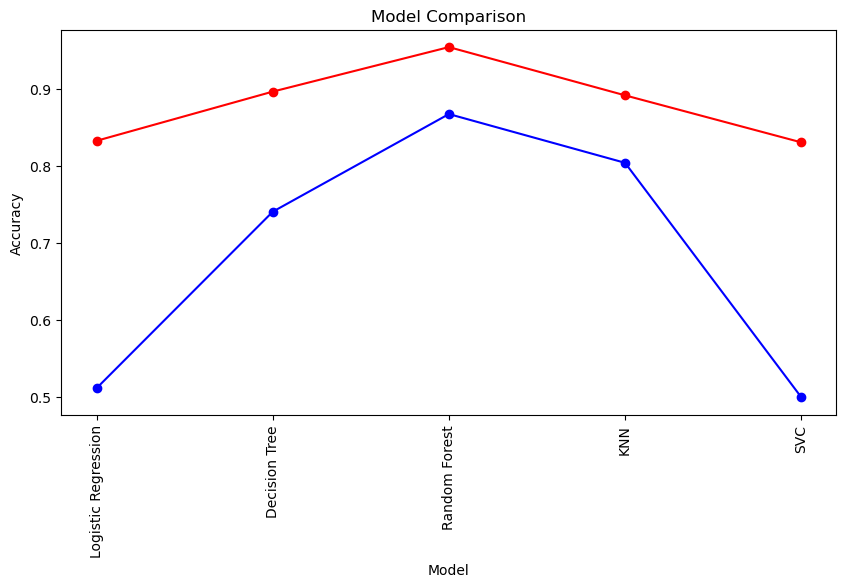

In [133]:
# model comparison

plt.figure(figsize=(10, 5))
plt.plot(model_comparison['Model'], model_comparison['Accuracy'], color='red', marker='o')
plt.plot(model_comparison['Model'], model_comparison['ROC AUC'], color='blue', marker='o')
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.show()

Accuracy of the model is : 0.9543802987484861
AUC ROC score of the model is: 0.8683184017408616


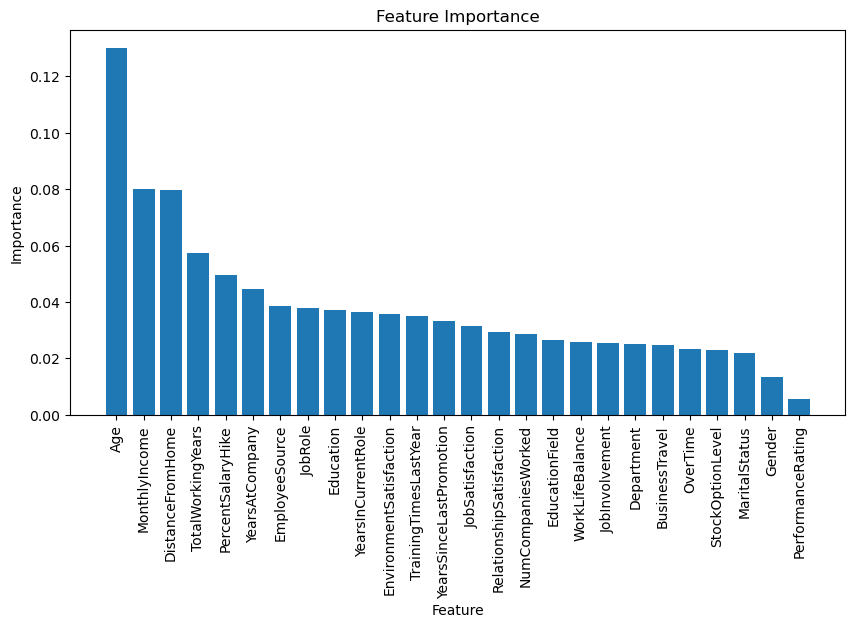

In [134]:
# feature importance plot RF Algorithm

model = RandomForestClassifier(max_features='sqrt', n_estimators=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy of the model is :',accuracy_score(y_test, y_pred))
print('AUC ROC score of the model is:',roc_auc_score(y_test, y_pred))

feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': model.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
feature_importance

plt.figure(figsize=(10, 5))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

In [135]:
# Final Results 
rf = RandomForestClassifier(max_features='sqrt', n_estimators=1000)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('ROC AUC Score: ', roc_auc_score(y_test, y_pred))

Accuracy Score:  0.9551877270892208
ROC AUC Score:  0.870699354121814


In [136]:
# Printing the confusion matrix
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n ', classification_report(y_test, y_pred))

Confusion Matrix: 
 [[2054    3]
 [ 108  312]]
Classification Report: 
                precision    recall  f1-score   support

           0       0.95      1.00      0.97      2057
           1       0.99      0.74      0.85       420

    accuracy                           0.96      2477
   macro avg       0.97      0.87      0.91      2477
weighted avg       0.96      0.96      0.95      2477



In [137]:
# Most risky employees
rf = RandomForestClassifier(max_features='sqrt', n_estimators=1000)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
y_pred_prob = rf.predict_proba(x_test)
y_pred_prob = y_pred_prob[:, 1]
y_pred_prob = pd.DataFrame(y_pred_prob)
y_pred_prob.columns = ['Probability']
y_pred_prob['Employee ID'] = x_test.index
y_pred_prob = y_pred_prob.sort_values(by='Probability', ascending=False)
y_pred_prob = y_pred_prob.reset_index(drop=True)
y_pred_prob.head(10)

,Probability,Employee ID
0,0.958,6912
1,0.940,5499
2,0.938,6151
3,0.935,3624
4,0.921,6889
5,0.915,2119
6,0.914,2598
7,0.904,1817
8,0.900,1801
9,0.898,3290


In [138]:
## Final dataset for model
data=data_model.drop(['BusinessTravel', 'Department', 'EducationField','Gender','JobInvolvement','JobSatisfaction',
                      'MaritalStatus','NumCompaniesWorked', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
                      'StockOptionLevel','TrainingTimesLastYear', 'WorkLifeBalance','YearsSinceLastPromotion',],axis=1)
data.head()

,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobRole,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,EmployeeSource,Age
0,1,-1.017343,2.0,2.0,7,5993.0,-1.183499,-0.398489,-0.147297,-0.049441,7,0.491078
1,1,-1.017343,2.0,2.0,7,5993.0,-1.183499,-0.398489,-0.147297,-0.049441,7,0.491078
2,1,-1.017343,2.0,4.0,3,14756.0,-0.417822,1.262824,-0.312259,-1.154751,1,0.491078
3,1,-1.017343,2.0,1.0,3,19566.0,-1.183499,2.796343,3.646831,1.055869,3,0.491078
4,1,-1.017343,2.0,1.0,7,6825.0,-1.183499,-0.142902,0.347589,0.779542,1,0.491078


In [139]:
# Splitting the dataset into feature and target
x=data.drop(['Attrition'],axis=1)
y=data['Attrition']

In [140]:
# assigning training and testing values
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.3)

In [141]:
# Model Creation
rf_final = RandomForestClassifier(max_features='sqrt', n_estimators=1000)
rf_final.fit(x_train, y_train)
y_pred = rf_final.predict(x_test)
acc_stdscale=accuracy_score(y_test, y_pred)
roc_stdscale=roc_auc_score(y_test, y_pred)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('ROC AUC Score: ', roc_auc_score(y_test, y_pred))

Accuracy Score:  0.9664917238595074
ROC AUC Score:  0.9068748987198185


In [142]:
# Saving model using pickle
pickle.dump(rf_final, open('model_stdscale.pkl','wb'))

In [143]:
# Loading model to compare the results
model = pickle.load( open('model_stdscale.pkl','rb'))

In [144]:
#checking whether the model is working
print(rf_final.predict([[10,2,1,7,5000,10,40,40,10,3,65]]))

[0]


In [145]:
print(rf_final.predict([[20,3,4,3,1000,5,20,15,5,7,55]]))

[0]


### Modeling MinMax Scaled Dataset

In [146]:
# Reading the saved dataset for Modeling
data_model=pd.read_csv('IBM_HR_Data_pre_minmax.csv')
data_model.head()

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,EmployeeSource,Age
0,1,2,2,0.0,2.0,1,2.0,0,3.0,7,4.0,2,2.624539,8.0,1,0.000000,3.0,1.0,0.0,2.00,0.000000,1.0,1.50,2.222222,0.000000,7,5.47619
1,1,2,2,0.0,2.0,1,2.0,0,3.0,7,4.0,2,2.624539,4.0,1,0.000000,3.0,1.0,0.0,2.00,0.000000,1.0,1.50,2.222222,0.000000,7,5.47619
2,1,2,2,0.0,2.0,1,4.0,0,3.0,3,3.0,0,7.239073,2.0,1,2.142857,3.0,3.0,3.0,5.25,3.333333,3.0,1.25,0.000000,0.000000,1,5.47619
3,1,2,2,0.0,2.0,1,1.0,0,3.0,3,1.0,1,9.771985,5.0,0,0.000000,3.0,4.0,0.0,8.25,8.333333,1.0,7.25,4.444444,7.333333,3,5.47619
4,1,2,2,0.0,2.0,1,1.0,1,3.0,7,2.0,1,3.062665,0.0,0,0.000000,3.0,4.0,1.0,2.50,3.333333,3.0,2.25,3.888889,2.666667,1,5.47619


In [147]:
# Splitting the dataset into feature and target
x=data_model.drop(['Attrition'],axis=1)
y=data_model['Attrition']

In [148]:
# assigning training and testing values
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.3)

In [149]:
# Table of Classification models used
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), SVC()]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM']

In [150]:
accuracy = []
roc_auc = []

for i in models:
    i.fit(x_train, y_train)
    y_pred = i.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_pred))

model_comparison = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy, 'ROC AUC': roc_auc})
model_comparison.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,ROC AUC
2,Random Forest,0.951151,0.857847
1,Decision Tree,0.916431,0.866312
3,KNN,0.840533,0.606502
0,Logistic Regression,0.832862,0.524196
4,SVM,0.830440,0.500000


In [151]:
# defining a fun to print results
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means=results.cv_results_['mean_test_score']
    stds=results.cv_results_['std_test_score']
    for mean,std, params in zip(means,stds,results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3),round(std*2,3),params))

In [152]:
# Best model using Logistic Regression
lr=LogisticRegression()
parameters = {
    'penalty': ['l2'], 
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}#'l1', 

cv=GridSearchCV(lr,parameters,cv=5)
cv.fit(x_train,y_train)

print('Logistic Regression Classifier')
print_results(cv)

Logistic Regression Classifier
BEST PARAMS: {'C': 0.01, 'penalty': 'l2'}

0.841 (+/-0.001) for {'C': 0.001, 'penalty': 'l2'}
0.843 (+/-0.005) for {'C': 0.01, 'penalty': 'l2'}
0.843 (+/-0.006) for {'C': 0.1, 'penalty': 'l2'}
0.843 (+/-0.006) for {'C': 1, 'penalty': 'l2'}
0.843 (+/-0.007) for {'C': 10, 'penalty': 'l2'}
0.843 (+/-0.007) for {'C': 100, 'penalty': 'l2'}
0.843 (+/-0.007) for {'C': 1000, 'penalty': 'l2'}


In [153]:
# Best model using Decision Tree
dtc=DecisionTreeClassifier()
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

cv=GridSearchCV(dtc,parameters,cv=5)
cv.fit(x_train,y_train)

print('Decision Tree Classifier')
print_results(cv)

Decision Tree Classifier
BEST PARAMS: {'criterion': 'gini', 'max_depth': 10}

0.841 (+/-0.001) for {'criterion': 'gini', 'max_depth': 1}
0.841 (+/-0.007) for {'criterion': 'gini', 'max_depth': 2}
0.845 (+/-0.008) for {'criterion': 'gini', 'max_depth': 3}
0.845 (+/-0.009) for {'criterion': 'gini', 'max_depth': 4}
0.852 (+/-0.003) for {'criterion': 'gini', 'max_depth': 5}
0.853 (+/-0.012) for {'criterion': 'gini', 'max_depth': 6}
0.858 (+/-0.006) for {'criterion': 'gini', 'max_depth': 7}
0.87 (+/-0.008) for {'criterion': 'gini', 'max_depth': 8}
0.876 (+/-0.011) for {'criterion': 'gini', 'max_depth': 9}
0.884 (+/-0.017) for {'criterion': 'gini', 'max_depth': 10}
0.841 (+/-0.001) for {'criterion': 'entropy', 'max_depth': 1}
0.843 (+/-0.004) for {'criterion': 'entropy', 'max_depth': 2}
0.844 (+/-0.006) for {'criterion': 'entropy', 'max_depth': 3}
0.843 (+/-0.007) for {'criterion': 'entropy', 'max_depth': 4}
0.852 (+/-0.009) for {'criterion': 'entropy', 'max_depth': 5}
0.85 (+/-0.02) for {'c

In [154]:
# Best model using Random Forest
rf=RandomForestClassifier()
parameters = {
    'n_estimators': [10, 100, 1000],
    'max_features': ['auto', 'sqrt', 'log2']}

cv=GridSearchCV(rf,parameters,cv=5)
cv.fit(x_train,y_train)

print('Random Forest Classifier')
print_results(cv)

Random Forest Classifier
BEST PARAMS: {'max_features': 'sqrt', 'n_estimators': 1000}

0.916 (+/-0.017) for {'max_features': 'auto', 'n_estimators': 10}
0.936 (+/-0.016) for {'max_features': 'auto', 'n_estimators': 100}
0.937 (+/-0.021) for {'max_features': 'auto', 'n_estimators': 1000}
0.917 (+/-0.017) for {'max_features': 'sqrt', 'n_estimators': 10}
0.936 (+/-0.016) for {'max_features': 'sqrt', 'n_estimators': 100}
0.938 (+/-0.02) for {'max_features': 'sqrt', 'n_estimators': 1000}
0.924 (+/-0.009) for {'max_features': 'log2', 'n_estimators': 10}
0.934 (+/-0.016) for {'max_features': 'log2', 'n_estimators': 100}
0.935 (+/-0.02) for {'max_features': 'log2', 'n_estimators': 1000}


In [155]:
# Best model using KNN
kn=KNeighborsClassifier()
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
    
cv=GridSearchCV(kn,parameters,cv=5)
cv.fit(x_train,y_train)

print('KNN Classifier')
print_results(cv)

KNN Classifier
BEST PARAMS: {'n_neighbors': 1}

0.885 (+/-0.018) for {'n_neighbors': 1}
0.859 (+/-0.015) for {'n_neighbors': 2}
0.845 (+/-0.019) for {'n_neighbors': 3}
0.847 (+/-0.012) for {'n_neighbors': 4}
0.841 (+/-0.013) for {'n_neighbors': 5}
0.843 (+/-0.007) for {'n_neighbors': 6}
0.839 (+/-0.006) for {'n_neighbors': 7}
0.842 (+/-0.004) for {'n_neighbors': 8}
0.841 (+/-0.005) for {'n_neighbors': 9}
0.841 (+/-0.005) for {'n_neighbors': 10}


In [ ]:
# Best model using SVM
sv=SVC()
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
##'kernel': ['linear'],,'rbf'
    

cv=GridSearchCV(sv,parameters,cv=5)
cv.fit(x_train,y_train)

print('SVM')
print_results(cv)

In [ ]:
# Table of hypertuned models

models = [LogisticRegression(C=0.01, penalty='l2'), DecisionTreeClassifier(criterion='gini', max_depth=10), RandomForestClassifier(max_features='sqrt', n_estimators=1000), KNeighborsClassifier(n_neighbors=1), SVC(C=100)]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVC']

accuracy = []
roc_auc = []

for i in models:
    i.fit(x_train, y_train)
    y_pred = i.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_pred))

model_comparison = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy, 'ROC AUC': roc_auc})
model_comparison.sort_values(by='Accuracy', ascending=False)

In [ ]:
# model comparison

plt.figure(figsize=(10, 5))
plt.plot(model_comparison['Model'], model_comparison['Accuracy'], color='red', marker='o')
plt.plot(model_comparison['Model'], model_comparison['ROC AUC'], color='blue', marker='o')
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# feature importance plot RF Algorithm

model = RandomForestClassifier(max_features='sqrt', n_estimators=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy of the model is :',accuracy_score(y_test, y_pred))
print('AUC ROC score of the model is:',roc_auc_score(y_test, y_pred))

feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': model.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
feature_importance

plt.figure(figsize=(10, 5))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Final Results 

rf = RandomForestClassifier(max_features='sqrt', n_estimators=1000)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('ROC AUC Score: ', roc_auc_score(y_test, y_pred))

In [ ]:
# Printing Confusion matrix
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n ', classification_report(y_test, y_pred))

In [ ]:
# Most risky employees

rf = RandomForestClassifier(max_features='sqrt', n_estimators=1000)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
y_pred_prob = rf.predict_proba(x_test)
y_pred_prob = y_pred_prob[:, 1]
y_pred_prob = pd.DataFrame(y_pred_prob)
y_pred_prob.columns = ['Probability']
y_pred_prob['Employee ID'] = x_test.index
y_pred_prob = y_pred_prob.sort_values(by='Probability', ascending=False)
y_pred_prob = y_pred_prob.reset_index(drop=True)
y_pred_prob.head(10)

In [ ]:
## Final dataset for model
data=data_model.drop(['BusinessTravel', 'Department', 'EducationField','Gender','JobInvolvement','JobSatisfaction',
                      'MaritalStatus','NumCompaniesWorked', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
                      'StockOptionLevel','TrainingTimesLastYear', 'WorkLifeBalance','YearsSinceLastPromotion',],axis=1)
data.head()

In [ ]:
# Splitting the dataset into feature and target
x=data.drop(['Attrition'],axis=1)
y=data['Attrition']

In [ ]:
# assigning training and testing values
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.3)

In [ ]:
# Model Creation
rf_final = RandomForestClassifier(max_features='sqrt', n_estimators=1000)
rf_final.fit(x_train, y_train)
y_pred = rf_final.predict(x_test)
acc_mmscale=accuracy_score(y_test, y_pred)
roc_mmscale=roc_auc_score(y_test, y_pred)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('ROC AUC Score: ', roc_auc_score(y_test, y_pred))

In [ ]:
# Saving model using pickle
pickle.dump(rf_final, open('model_minmax.pkl','wb'))

In [ ]:
# Loading model to compare the results
model = pickle.load( open('model_minmax.pkl','rb'))

In [ ]:
print(rf_final.predict([[20,1,1,7,1000,5,20,15,5,7,65]]))

In [ ]:
print(rf_final.predict([[20,3,4,3,1000,5,20,15,5,7,55]]))

In [ ]:
print(rf_final.predict([[1,2,2,7,1000,11,8,6,4,7,41]]))

### Modeling After Stratified Cross Validation

In [ ]:
# Reading the saved dataset for Modeling
data_model=pd.read_csv('IBM_HR_Data_pre_noscale.csv')
data_model.head()

In [ ]:
# Splitting the dataset into feature and target
x=data_model.drop(['Attrition'],axis=1)
y=data_model['Attrition']

In [ ]:
# assigning training and testing values
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.3)

In [ ]:
# Stratified K Fold Validation
skf_validator= StratifiedKFold(n_splits =10)

In [ ]:
#checking cv score

for i in models:
    skcv_result=cross_val_score(i,x,y,cv=skf_validator)
    acc=np.mean(skcv_result)
    print(i,"accuracy is",acc)

In [ ]:
# defining a fun to print results
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means=results.cv_results_['mean_test_score']
    stds=results.cv_results_['std_test_score']
    for mean,std, params in zip(means,stds,results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3),round(std*2,3),params))

In [ ]:
# Best model using Logistic Regression
lr=LogisticRegression()
parameters = {
    'penalty': ['l2'], 
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}#'l1', 

cv=GridSearchCV(lr,parameters,cv=skf_validator)
cv.fit(x_train,y_train)

print('Logistic Regression Classifier')
print_results(cv)

In [ ]:
# Best model using Decision Tree
dtc=DecisionTreeClassifier()
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

cv=GridSearchCV(dtc,parameters,cv=skf_validator)
cv.fit(x_train,y_train)

print('Decision Tree Classifier')
print_results(cv)

In [ ]:
# Best model using Random Forest
rf=RandomForestClassifier()
parameters = {
    'n_estimators': [10, 100, 1000],
    'max_features': ['auto', 'sqrt', 'log2']}

cv=GridSearchCV(rf,parameters,cv=skf_validator)
cv.fit(x_train,y_train)

print('Random Forest Classifier')
print_results(cv)

In [ ]:
# Best model using KNN
kn=KNeighborsClassifier()
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
    
cv=GridSearchCV(kn,parameters,cv=skf_validator)
cv.fit(x_train,y_train)

print('KNN Classifier')
print_results(cv)

In [ ]:
# Best model using SVM
sv=SVC()
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
##'kernel': ['linear'],,'rbf'
    

cv=GridSearchCV(sv,parameters,cv=skf_validator)
cv.fit(x_train,y_train)

print('SVM')
print_results(cv)

In [ ]:
# List of hypertuned models

models = [LogisticRegression(C=0.001, penalty='l2'), DecisionTreeClassifier(criterion='gini', max_depth=10), RandomForestClassifier(max_features='sqrt', n_estimators=1000), KNeighborsClassifier(n_neighbors=1), SVC(C=0.001)]#
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVC']#

for i in models:
    skcv_result=cross_val_score(i,x,y,cv=skf_validator)
    acc=np.mean(skcv_result)
    print(i,acc)

In [ ]:
## Final dataset for model
data=data_model.drop(['BusinessTravel', 'Department', 'EducationField','Gender','JobInvolvement','JobSatisfaction',
                      'MaritalStatus','NumCompaniesWorked', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
                      'StockOptionLevel','TrainingTimesLastYear', 'WorkLifeBalance','YearsSinceLastPromotion',],axis=1)
data.head()

In [ ]:
# Splitting the dataset into feature and target
x=data.drop(['Attrition'],axis=1)
y=data['Attrition']

In [ ]:
# Model Creation
skcv_result_final=cross_val_score(LogisticRegression(C=0.001),x,y,cv=skf_validator)
acc=np.mean(skcv_result_final)
acc_scv=acc
print(LogisticRegression(C=0.001),"accuracy of the model is",acc)


In [ ]:
# Saving model using pickle
import pickle
pickle.dump(skcv_result_final, open('model_noscale_scv.pkl','wb'))

In [ ]:
# Loading model to compare the results
model = pickle.load( open('model_noscale_scv.pkl','rb'))

### The performance metrics of different models used for final modeling in each category

In [ ]:
print('The accuracy and ROC AUC for unscaled dataset is',acc_noscale,"and",roc_noscale,"respectively.")
print('The accuracy and ROC AUC for Standard scaled dataset is',acc_stdscale,"and",roc_stdscale,"respectively.")
print('The accuracy and ROC AUC for Min Max scaled dataset is',acc_mmscale,"and",roc_mmscale,"respectively.")
print('The accuracy after Startified Cross Validation is',acc_scv)